Student Name:  Sue Mir

Cohort: Data Science / Part Time October/19

Blog post url: https://sue-mir.github.io/  - Blog Post "Data Science is in the Now"

Video url:

# BOOKMARKS
### [PROCESS-CHECKLIST](#PROCESS-CHECKLIST)
- [OBTAIN](#OBTAIN) 
- [SCRUB](#SCRUB) 
- [EXPLORE](#EXPLORE) 
- [MODEL](#MODEL) 
- [iNTERPRET](#iNTERPRET) 

### [CONCLUSIONS & RECOMMENDATIONS](#CONCLUSIONS-&-RECOMMENDATIONS)
___

# Project Description and Approach

Description:
    
To perform regression analysis on the subset of KC Housing Data in order to find a positive linear relationship
between house price and selected predictor values explored and discovered in the regression analysis.

To present the findings to a non-technical audience within a given timeframe of 5 minutes that is clear and
informative, representative of the interest of this audience which is 
'What factors from the findings in this analysis influence the increase in House Price?'

Approach:
To obtain the data, view it and decide:
Which values need data cleaning that have unusual values and are not numeric data types and how to clean that data/convert the data types so that not only they are representative of the data but also are numerical in order to be processed easily by the regression algorithm.

To perform EDA on the data in order to find relationships in the data and normalization patterns that may require further cleaning in order to normalise.

To build a regression model in order to find the best fit predictor values with the lowest kurtosis, skew and R2 value, the highest linearity to the regression line, (the least variance).

To analyse the regression model results and further perform train testing on the model.

To be able to present answers to the a technical audience on which predictors had a positive influence on House Prices and why.


# OBTAIN


#### Initialise and Load Libraries

In [572]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.formula.api import ols
from scipy import stats
    
#------------Stop the deprecation warning from popping up
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#### Load the data and display general summary of data

In [573]:
#------------Read the data file into pandas datafile object
pd.set_option('display.max_columns', 21)
df = pd.read_csv('kc_house_data.csv')
display(df.head())  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [574]:
#------------Display general overview of the data
#Data Initial Overview - Display info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

In [575]:
#Data Initial Overview - Display first 5 rows
display(df.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [576]:
#Data Initial Overview - Display last 5 rows
display(df.tail())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,3,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [577]:
#Data Initial Overview - Display a sample of 20 rows
display(df.sample(20))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4052,9297301055,12/9/2014,363000.0,2,1.00,1120,4800,1.0,0.0,0.0,3,7,770,?,1926,NaN,98126,47.5669,-122.372,1510,4800
534,1521069070,2/18/2015,204000.0,3,1.00,1040,7405,1.0,0.0,0.0,4,6,1040,0.0,1971,0.0,98010,47.3105,-122.021,1580,7405
11379,9542000340,8/7/2014,500000.0,3,1.75,1560,16194,1.0,0.0,0.0,3,8,1560,0.0,1961,0.0,98005,47.5966,-122.175,2430,16193
12199,1727850350,11/12/2014,1190000.0,4,2.50,3480,12164,1.5,0.0,0.0,4,11,3480,0.0,1984,NaN,98005,47.6404,-122.171,3960,16855
3768,622059019,9/19/2014,220000.0,5,1.50,1830,94960,1.5,0.0,0.0,3,7,1830,0.0,1929,0.0,98031,47.4218,-122.218,1440,16365
5871,9826701735,11/12/2014,449950.0,3,2.00,1880,3048,2.0,0.0,0.0,4,7,1880,0.0,1902,0.0,98122,47.6031,-122.303,1680,3600
7589,8899100230,3/11/2015,345000.0,3,1.75,1520,7439,1.0,0.0,0.0,4,7,1520,?,1969,0.0,98055,47.4570,-122.208,1650,7500
20005,9834201366,12/16/2014,429900.0,3,2.00,1490,1286,3.0,0.0,0.0,3,8,1490,0.0,2014,0.0,98144,47.5700,-122.288,1420,1230
20330,5379805260,3/26/2015,400200.0,4,3.50,2260,30250,2.0,0.0,0.0,3,7,2260,0.0,2013,0.0,98188,47.4493,-122.281,1270,16350
21407,7708200180,7/10/2014,535000.0,5,3.25,2850,4551,2.0,0.0,0.0,3,8,2370,480.0,2006,0.0,98059,47.4916,-122.144,2850,4849


In [578]:
#Data Initial Overview - Table dimensions
df.shape

(21597, 21)

In [579]:
#------------ Display general statistics of each column')
np.round(df.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540297.0,3.0,2.0,2080.0,15099.0,1.0,0.0,0.0,3.0,8.0,1789.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12758.0
std,2.876736e+09,367368.0,1.0,1.0,918.0,41413.0,1.0,0.0,1.0,1.0,1.0,828.0,29.0,400.0,54.0,0.0,0.0,685.0,27274.0
min,1.000102e+06,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


In [580]:
#------------Check for columns with nulls
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [581]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# SCRUB

### Scrub Iteration 1


#### Decide on what to do with the Nulls and Unusual Datatypes


In [582]:
# [waterfront] has 2376/21597 (11%) null values 
# waterfront is a nominal categorical
df['waterfront'].isnull().sum()
# replace NaN with the mean value = 0
df['waterfront'].fillna(0,inplace=True)
# waterfront is to be turned into a numeric value and observed as boolean(has waterfront 1=True, 0 = False) 
#as values show only 1 or 0
df['waterfront'].value_counts()
# 0.0    19075
# 1.0      146
# Name: waterfront, dtype: int64
# df['waterfront'] = df['waterfront'].astype('bool') - pandas needs numeric values to plot
df['waterfront'] = pd.to_numeric(df['waterfront'])

In [583]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [584]:
# [view] has a small amount of null values
# view is a nominal categorical
df['view'].isnull().sum()
#63
df['view'].value_counts()
#0.0    19422
#2.0      957
#3.0      508
#1.0      330
#4.0      317
#Name: view, dtype: int64
#Only a small amount of nulls, replace NaN with 0
df['view'].fillna(0,inplace=True)
#view has far too many 0’s compared to all other values making it heavily skewed.  
# drop view column
df = df.drop(["view"], axis=1)
# df.view.astype(bool).value_counts().plot(kind='bar');

In [585]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [586]:
# [yr_renovated] has 3842/21597 (17.78%) null values
df['yr_renovated'].isnull().sum()
#3842
#how many different values does it have?  it has many zeros
df['yr_renovated'].value_counts().head()
#0.0       17011
#2014.0       73
#2003.0       31
#2013.0       31
#2007.0       30
df = df.drop(["yr_renovated"], axis=1)

In [587]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [588]:
# check if [id column] has unique values
id_list = df['id'].unique().tolist()
len(id_list)
#21420 out of 21597 values are unique
#bin id column as it is not linear or has any linear/numerical relationship
df = df.drop(["id"], axis=1)


#### Check potential categoricals - Scrub nulls and object datatypes


In [589]:
# check [zipcode] column - number of unique values to consider binning
zipcode_list = df['zipcode'].unique().tolist()
# zipcode is a nominal categorical
len(zipcode_list)
#70 out of 21597 values are unique

70

In [590]:
# check unique values for [yr_built] column for number of unique values
# yr_built_list is a nominal categorical
yr_built_list = df['yr_built'].unique().tolist()
len(yr_built_list)  #116
min(yr_built_list) #1900
max(yr_built_list) #2015

2015

In [591]:
# check unique values for [sqft_basement] column for number of unique values
sqft_basement_list = df['sqft_basement'].unique().tolist()
len(sqft_basement_list)  #304  
# view the values as only small list
sqft_basement_list
# there are odd values including '?' and, check the number of '?' and 0 values
sqft_basement_list = df['sqft_basement'].unique().tolist()
len(sqft_basement_list)  #304   
# check how many '?' and '0' value counts
check_values_sqft_basement_list = df['sqft_basement']
qmark_count = 0
zero_count = 0
sum_total = 0
for item in  check_values_sqft_basement_list:
    if item == '?':
        qmark_count += 1
    elif item == '0.0':
        zero_count +=1
    else:
        sum_total += float(item)

zero_count   #12826 
qmark_count  #454

# convert the values with '?' to the mean
mean_sqft_basement = (sum_total / len(check_values_sqft_basement_list)) #2015

In [592]:
#------------Decide on what to do with unusual datatypes like object data types
# [sqft_basement] convert the values with '?' to mean value
df['sqft_basement'].loc[df['sqft_basement'] == '?'] = mean_sqft_basement
# check unique value list for sqft_basement to check '?' are converted
sqft_basement_list = df['sqft_basement'].unique().tolist()
len(sqft_basement_list)  #304  
# view the values as its only a small list
sqft_basement_list
# convert datatype of sqft_basement safely to numeric
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 3.0+ MB


In [594]:
type(df['date'])
#[Date] object data type converted into datetime
df['date'] = pd.to_datetime(df['date'])
#double check everything looks right
df['date'].head()
# query the data type for date column
type(df['date'][0]) #pandas._libs.tslibs.timestamps.Timestamp

#Question of Interest:  What sales dates does this data cover?
df['date'].min()    #Timestamp('2014-05-02 00:00:00')
df['date'].max()    #Timestamp('2015-05-27 00:00:00')

Timestamp('2015-05-27 00:00:00')

In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(10)
memory usage: 3.0 MB



#### Bin Categoricals, Encode and get Dummys

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,"ZIP_(98033, 98065]","ZIP_(98065, 98118]","ZIP_(98118, 98199]"
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,47.5112,-122.257,1340,5650,0,0,1
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639,0,0,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,47.7379,-122.233,2720,8062,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,47.5208,-122.393,1360,5000,0,0,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503,0,1,0


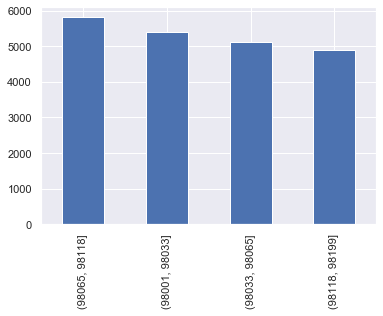

In [596]:
#Bin Nominal Categoricals - [zipcode]
#df['zipcode'].describe()
# First, create bins based on the values observed. 5 values will result in 4 bins
zipbins = [98001, 98033, 98065, 98118, 98199]

# Use pd.cut()
bins_zip = pd.cut(df['zipcode'], zipbins)

# # Using pd.cut() returns unordered categories. Transform this to ordered categories 
bins_zip = bins_zip.cat.as_ordered()
bins_zip.head()
# Check if the result is balanced
bins_zip.value_counts().plot(kind='bar');

# Inspect the result
#bins_zip.value_counts().plot(kind='bar')

# Replace the existing 'zipcode' column
df['zipcode']=bins_zip

#Perform label encoding
df['zipcode'] = df['zipcode'].cat.codes

zipcode_dummy = pd.get_dummies(bins_zip, prefix='ZIP', drop_first=True)
df = df.drop(['zipcode'], axis=1)

df = pd.concat([df, zipcode_dummy], axis=1)
df.head()



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,lat,long,sqft_living15,sqft_lot15,"ZIP_(98033, 98065]","ZIP_(98065, 98118]","ZIP_(98118, 98199]","YRBLT_(1951, 1975]","YRBLT_(1975, 1997]","YRBLT_(1997, 2015]"
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,...,47.5112,-122.257,1340,5650,0,0,1,1,0,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,...,47.7210,-122.319,1690,7639,0,0,1,0,0,0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,...,47.7379,-122.233,2720,8062,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,...,47.5208,-122.393,1360,5000,0,0,1,1,0,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,...,47.6168,-122.045,1800,7503,0,1,0,0,1,0


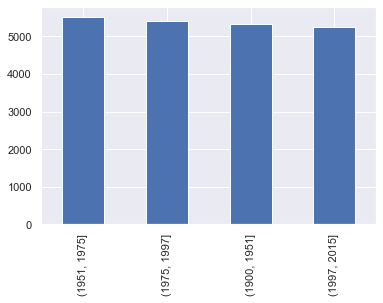

In [597]:
#Bin Nominal Categoricals - yr_built
#check value range for yr_built
# check unique values for [sqft_basement] column for number of unique values
yr_built_list = df['yr_built'].unique().tolist()
yr_built_list #1900 - 2015
df['yr_built'].describe()
# first, create bins based on the values observed. 
bins = [1900, 1951, 1975, 1997, 2015]
# use pd.cut to create variable to store bins
bins_year = pd.cut(df['yr_built'], bins)
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_year = bins_year.cat.as_unordered()
bins_year.head()
# Check if the result is balanced
bins_year.value_counts().plot(kind='bar');
# replace the existing "yr_built" column
df['yr_built']=bins_year
#Perform label encoding
df['yr_built'] = df['yr_built'].cat.codes

yrbuilt_dummy = pd.get_dummies(bins_year, prefix='YRBLT', drop_first=True)
df = df.drop(['yr_built'], axis=1)

df = pd.concat([df, yrbuilt_dummy], axis=1)
df.head()

In [598]:
#Rename hot encoded names as the automatic names may cause errors when regression modelling on these columns
df = df.rename(columns = {"YRBLT_(1951, 1975]": "YRBLT_1951_1975"}) 
df = df.rename(columns = {"YRBLT_(1975, 1997]": "YRBLT_1975_1997"}) 
df = df.rename(columns = {"YRBLT_(1997, 2015]": "YRBLT_1997_2015"}) 
df = df.rename(columns = {"ZIP_(98033, 98065]": "ZIP_98033_98065"}) 
df = df.rename(columns = {"ZIP_(98065, 98118]": "ZIP_98065_98118"})  
df = df.rename(columns = {"ZIP_(98118, 98199]": "ZIP_98118_98199"}) 
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,lat,long,sqft_living15,sqft_lot15,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,...,47.5112,-122.257,1340,5650,0,0,1,1,0,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,...,47.7210,-122.319,1690,7639,0,0,1,0,0,0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,...,47.7379,-122.233,2720,8062,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,...,47.5208,-122.393,1360,5000,0,0,1,1,0,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,...,47.6168,-122.045,1800,7503,0,1,0,0,1,0


### Scrub - Iteration 2
### To be run after EDA

#### Drop columns from multicollinearity results

In [599]:
#drop features that correlate greater than 0.75 one at a time, starting from the greatest. 
#Check multicollinearity again, then drop the next highest until none are greater than 0.75 to one another.
df = df.drop(["sqft_lot"], axis=1)
df = df.drop(["sqft_lot15"], axis=1)
df = df.drop(["sqft_living15"], axis=1)
df = df.drop(["sqft_above"], axis=1)
df = df.drop(["sqft_basement"], axis=1)

df.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
0,2014-10-13,221900.0,3,1.00,1180,1.0,0.0,3,7,47.5112,-122.257,0,0,1,1,0,0
1,2014-12-09,538000.0,3,2.25,2570,2.0,0.0,3,7,47.7210,-122.319,0,0,1,0,0,0
2,2015-02-25,180000.0,2,1.00,770,1.0,0.0,3,6,47.7379,-122.233,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,1.0,0.0,5,7,47.5208,-122.393,0,0,1,1,0,0
4,2015-02-18,510000.0,3,2.00,1680,1.0,0.0,3,8,47.6168,-122.045,0,1,0,0,1,0


In [600]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.00000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.494096,0.006760,3.409825,7.657915,47.560093,-122.213982,0.236838,0.269111,0.226883,0.255360,0.250544,0.24346
std,3.673681e+05,0.926299,0.768984,918.106125,0.539683,0.081944,0.650546,1.173200,0.138552,0.140724,0.425152,0.443508,0.418826,0.436073,0.433336,0.42918
min,7.800000e+04,1.000000,0.500000,370.000000,1.000000,0.000000,1.000000,3.000000,47.155900,-122.519000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.220000e+05,3.000000,1.750000,1430.000000,1.000000,0.000000,3.000000,7.000000,47.471100,-122.328000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,3.000000,7.000000,47.571800,-122.231000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,4.000000,8.000000,47.678000,-122.125000,0.000000,1.000000,0.000000,1.000000,1.000000,0.00000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,5.000000,13.000000,47.777600,-121.315000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


#### Drop more categoricals 

In [601]:
#drop (at discretion) categoricals - look like vertical lines on scatter plots
df = df.drop(["condition"], axis=1)   #there is no numerical order to condition and no relationship with target
df = df.drop(["floors"], axis=1)
df = df.drop(["date"], axis=1)
#drop date as it is non numeric - use later for interesting data analysis but drop for modelling for the moment
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
0,221900.0,3,1.00,1180,0.0,7,47.5112,-122.257,0,0,1,1,0,0
1,538000.0,3,2.25,2570,0.0,7,47.7210,-122.319,0,0,1,0,0,0
2,180000.0,2,1.00,770,0.0,6,47.7379,-122.233,0,0,0,0,0,0
3,604000.0,4,3.00,1960,0.0,7,47.5208,-122.393,0,0,1,1,0,0
4,510000.0,3,2.00,1680,0.0,8,47.6168,-122.045,0,1,0,0,1,0


#### Remove Outliers outside Box Plot Min/Max

In [602]:
def scrub_find_remove_outliers(column): 
    """Use scipy to calcualte absolute Z-scores 
    and return boolean series where True indicates it is an outlier
    Args:
        col (Series): a series/column from your DataFrame
    Returns:
        idx_outliers (Series): series of  True/False for each row in col
        
    Ex:
    >> idx_outs = find_outliers(df['bedrooms'])
    >> df_clean = df.loc[idx_outs==False]"""
    #----------------------------------------------------------------------------------
    #------------ Remove outliers - values outside the min / max of the box plot 
    #------------ Scrub Iteration 2 - To be run after Explore
    #---------------------------------------------------------------------------------- 
    
    from scipy import stats
    z = np.abs(stats.zscore(column))
    idx_outliers = np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=column.index)

df2 = df.copy()

for column in df.columns:

    idx = scrub_find_remove_outliers(df[column])
    idx
    #     display(df.loc[idx==True].describe().round(3))
    #     display(df.loc[idx==False].describe().round(3))
    df = df.loc[idx==False]

In [603]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,waterfront,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
count,2.033100e+04,20331.000000,20331.000000,20331.000000,20331.0,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000
mean,4.930752e+05,3.329153,2.052248,1977.655551,0.0,7.544882,47.559305,-122.220640,0.228715,0.272195,0.233338,0.262899,0.245487,0.236437
std,2.410595e+05,0.856769,0.692595,751.159560,0.0,1.009444,0.140548,0.131662,0.420015,0.445101,0.422966,0.440219,0.430386,0.424904
min,7.800000e+04,1.000000,0.500000,370.000000,0.0,5.000000,47.159300,-122.519000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.170000e+05,3.000000,1.500000,1410.000000,0.0,7.000000,47.465500,-122.331000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.400000e+05,3.000000,2.250000,1870.000000,0.0,7.000000,47.571500,-122.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.130000e+05,4.000000,2.500000,2449.000000,0.0,8.000000,47.679700,-122.131000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.640000e+06,6.000000,4.250000,4460.000000,0.0,10.000000,47.777600,-121.792000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Log Transform / Standardise Numerical Columns

In [604]:
#Standardize columns

#assign each column to variable for easier access
sqftliving = df["sqft_living"]
bedrm = df["bedrooms"]
bathrm = df["bathrooms"]
df["bedrooms"] = (bedrm-np.mean(bedrm))/np.sqrt(np.var(bedrm))
df["bathrooms"] = (bathrm-np.mean(bathrm))/np.sqrt(np.var(bathrm))
df["sqft_living"] = (sqftliving-np.mean(sqftliving))/np.sqrt(np.var(sqftliving))
df.head()
#consider the mean and co-efficient from these values in the model

,price,bedrooms,bathrooms,sqft_living,waterfront,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
0,221900.0,-0.384188,-1.519320,-1.061925,0.0,7,47.5112,-122.257,0,0,1,1,0,0
1,538000.0,-0.384188,0.285530,0.788593,0.0,7,47.7210,-122.319,0,0,1,0,0,0
2,180000.0,-1.551392,-1.519320,-1.607761,0.0,6,47.7379,-122.233,0,0,0,0,0,0
3,604000.0,0.783016,1.368441,-0.023505,0.0,7,47.5208,-122.393,0,0,1,1,0,0
4,510000.0,-0.384188,-0.075440,-0.396271,0.0,8,47.6168,-122.045,0,1,0,0,1,0


In [605]:
df.describe().round(3)

,price,bedrooms,bathrooms,sqft_living,waterfront,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
count,20331.000,20331.000,20331.000,20331.000,20331.0,20331.000,20331.000,20331.000,20331.000,20331.000,20331.000,20331.000,20331.000,20331.000
mean,493075.163,-0.000,0.000,-0.000,0.0,7.545,47.559,-122.221,0.229,0.272,0.233,0.263,0.245,0.236
std,241059.501,1.000,1.000,1.000,0.0,1.009,0.141,0.132,0.420,0.445,0.423,0.440,0.430,0.425
min,78000.000,-2.719,-2.241,-2.140,0.0,5.000,47.159,-122.519,0.000,0.000,0.000,0.000,0.000,0.000
25%,317000.000,-0.384,-0.797,-0.756,0.0,7.000,47.466,-122.331,0.000,0.000,0.000,0.000,0.000,0.000
50%,440000.000,-0.384,0.286,-0.143,0.0,7.000,47.572,-122.240,0.000,0.000,0.000,0.000,0.000,0.000
75%,613000.000,0.783,0.647,0.628,0.0,8.000,47.680,-122.131,0.000,1.000,0.000,1.000,0.000,0.000
max,1640000.000,3.117,3.173,3.305,0.0,10.000,47.778,-121.792,1.000,1.000,1.000,1.000,1.000,1.000


___
# Scrub Observations


#### Dropped Columns
view - dropped - has far too many 0’s compared to all other values in the column making it heavily skewed. 

yr_renovated - dropped - how many different values does it have?  it has many zeros
df['yr_renovated'].value_counts().head()

id - dropped -  as it is not linear or has any linear/numerical relationship

date - has object data type, converted to date date type, keep for potential interesting reports for non technical presentation, do not include in models or graphs as it is non numerical and will error. delete

yr_built - kept - consider using for extra interesting reports for non technical presentation.  delete for model

#### Kept columns
waterfront - kept - is to be turned into a numeric value and observed as boolean(has waterfront 1=True, 0 = False) as unique values show only 1 or 0

zipcode - kept - consider categorising and hot encoding as has 70 / 21597 unique values

#### Scrub column data further
sqft_basement - has unusual data including a '?', and is of object type.  Need to convert '?', nulls and datatype to numeric

#### Remove outliers
All columns were checked for outliers outside of boxplot min/max and trimmed off
    
#### GENERAL OVERVIEW SO FAR
    
Remaining columns to keep on regression modeling that are not dropped:
waterfront, zipcode, yr_built, sqft_basement, sqft_living, lat, long, bedrooms, bathrooms

Remaining columns to keep for consideration of interesting reports for non technical:
date, yr_built


# EXPLORE

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


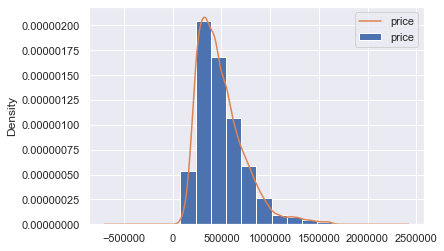

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


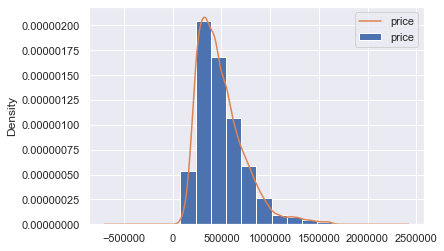

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


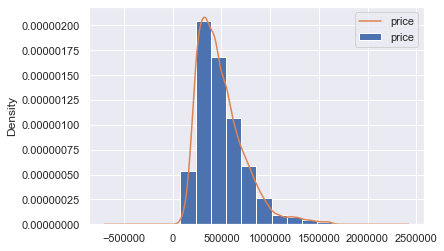

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


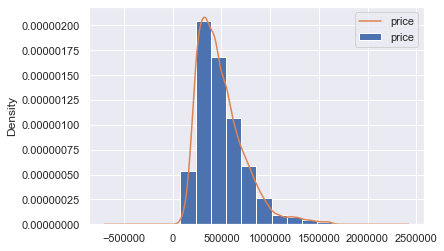

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


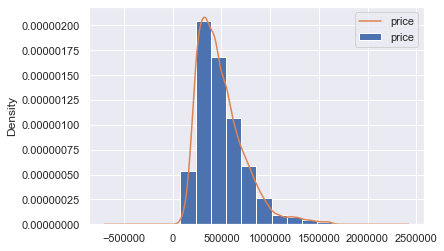

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


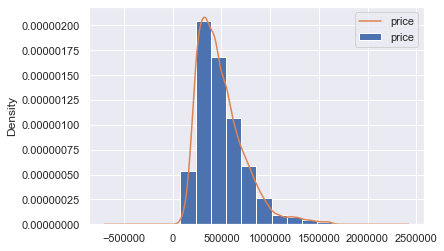

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


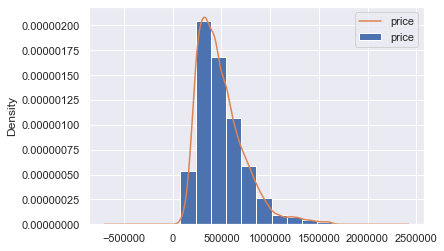

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


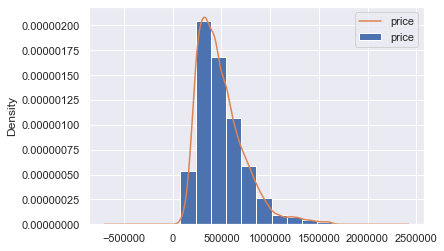

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


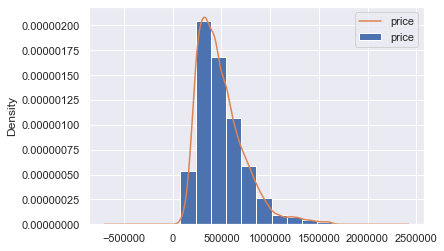

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


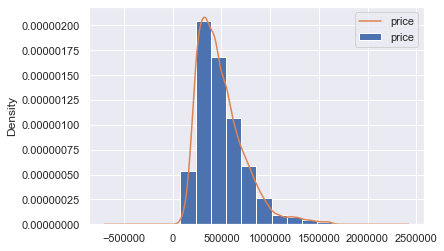

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


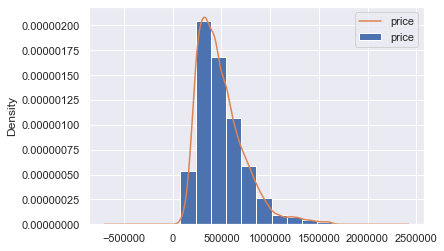

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


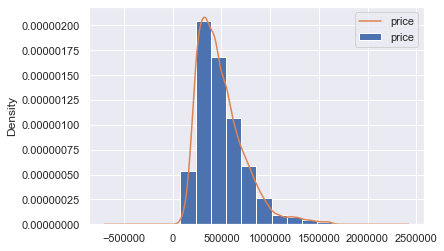

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


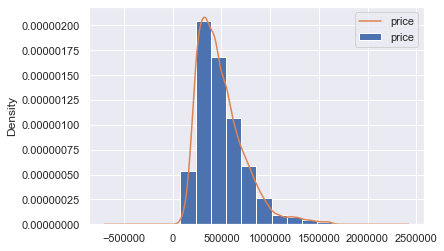

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


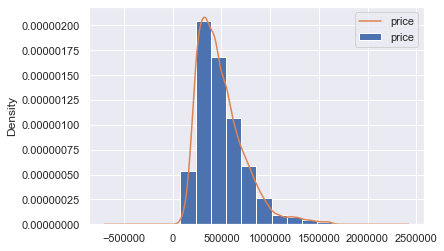

In [606]:
def explore_normality_hist_kde(column):
    """ Display hist and kde graphs for column in datafile df
    Arguments:
        column - string - data column to create box plot
    Returns: 
    """
    #----------------------------------------------------------------------------------
    #------------Check normality through hist and kde plots of the predictor column
    #----------------------------------------------------------------------------------
    df[column].plot.hist(normed=True, label=column)
    df[column].plot.kde(label=column)
    plt.legend()
    plt.show()
    
for column in df:
     explore_normality_hist_kde('price')


___
## Observations

#### Histogram and KDE Plots

##### Question:  Which variables are easiest to further normalise?
Columns with Long Tails on both side and have less skew to one side, potentially have closer to a bell curve - attempt to remove outliers and normalise
bedrooms
bathrooms
sqft_living
grade
sqft_above
long
lat
sqft_living_15

##### Question:  Which variables are difficult to further normalise?
Columns with Long Tails skewed on one side, left or right (positive or negative) are difficult to continue to normalise - potentially drop column
sqft_lot15, sqft_basement  They are skewed towards one side of the graph.

##### Question:  Which variables are potentially categories?
floors, waterfront (very long tails), condition (very long tails)

##### Question:  Which variables can be hot encoded to normalise in groups?
Potential categorical columnss, look at their description (mean, max, min) and normalize accordingly around these
description values
Columns that are binned
zip, yr_built

___

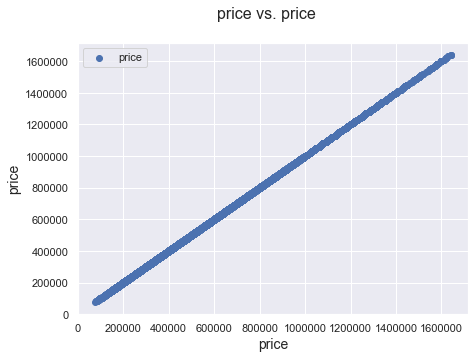

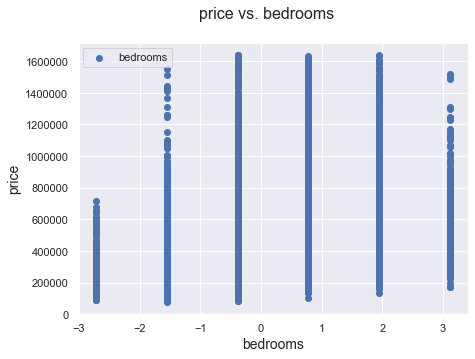

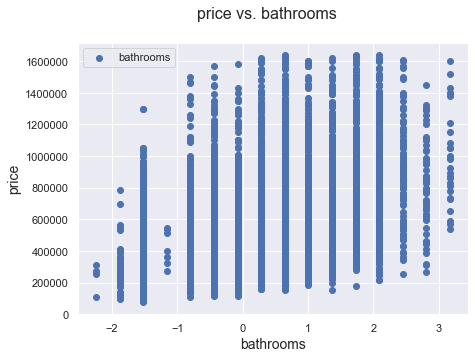

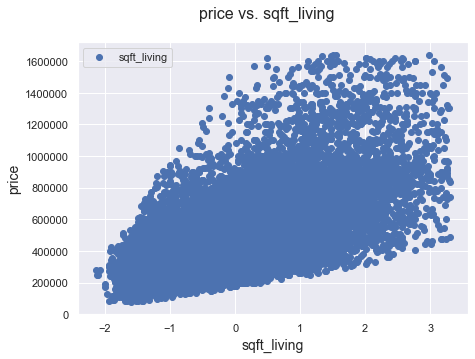

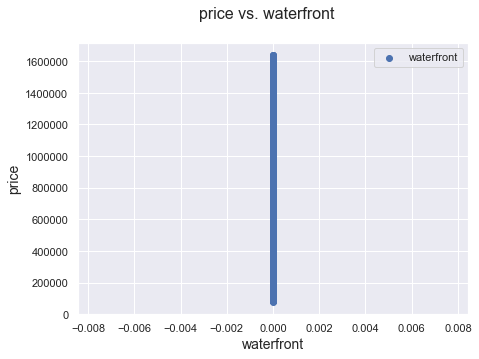

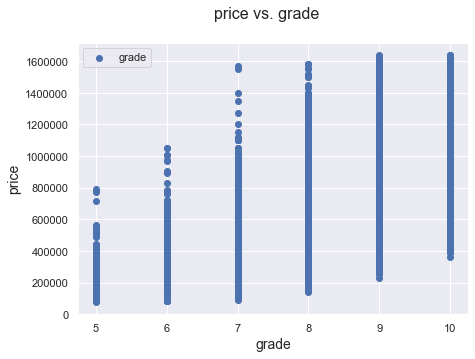

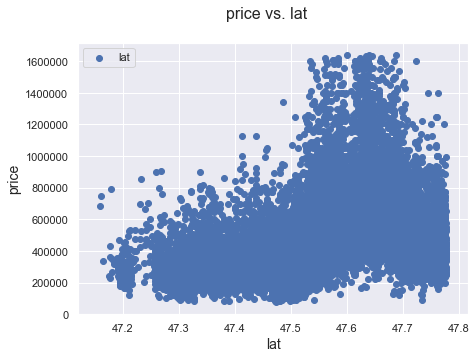

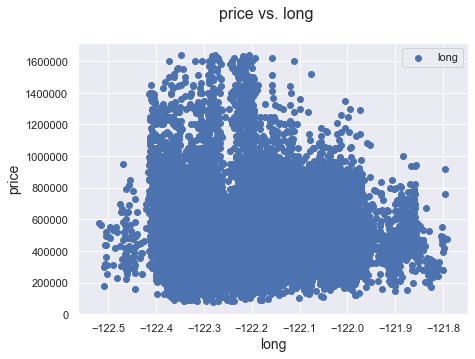

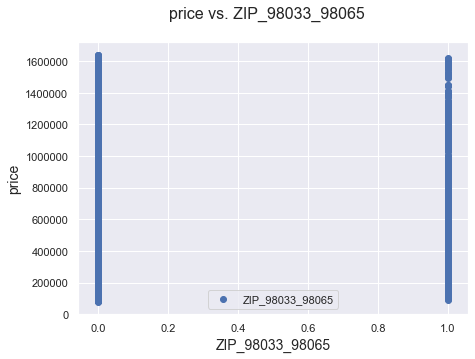

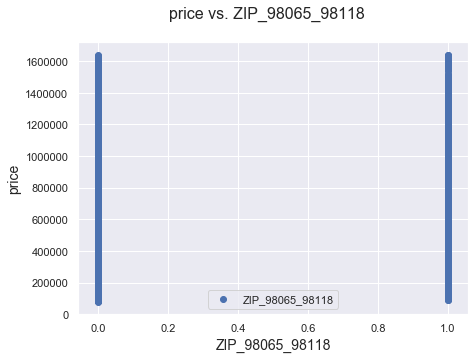

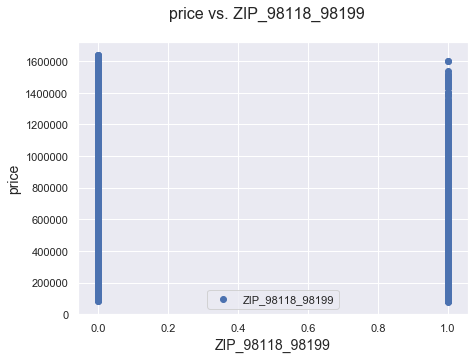

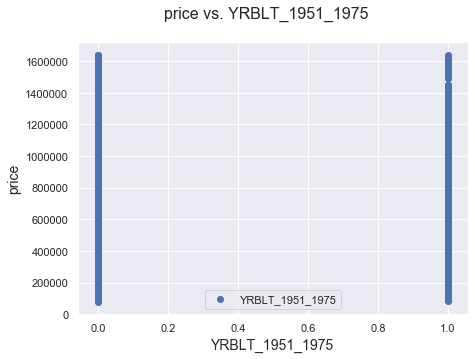

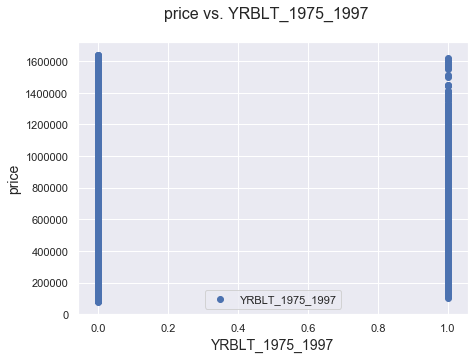

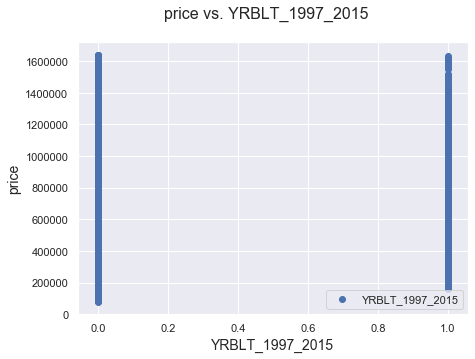

In [607]:
def explore_relationship_target_predictor(column):
    """ Display scatterplot with relationship between column and target price
    Arguments:
        column - string - data column to create box plot
    Returns: 
    """
    #----------------------------------------------------------------------------------
    #------------Check relationship of predictor to target column
    #----------------------------------------------------------------------------------
    #With scatter plot
    fig = plt.figure(figsize=(7, 5))
    fig.suptitle('price vs. ' + column, fontsize=16)
    plt.scatter(df[column], df['price'], label=column)
    plt.legend()
    plt.xlabel(column, fontsize=14)
    plt.ylabel('price', fontsize=14)
    plt.show()

for column in df:
    explore_relationship_target_predictor(column)

___
## Observations

#### Scatter Plots on Relationship between Target and Predictors

##### Question: Which variables are potential categories?
columns which have vertical relationship with target - potentially categories - drop these columns
floors, condition, waterfront.  The columns like floors and condition that don't display a relationship further in the qq or scatter plots are to be dropped.

columns which have vertical relationship with target - potentially categories - keep out of further interest
zip  (binned, hot encoded)
yr_built (binned, hot encoded)

columns which have vertical linear relationship with target - potentially categories - keep these columns for further exploring
grade

##### Question:  Which variables have little or no relationship with target?
Columns that do not show a positive direction of growth in y value (target)
columns which have a little or no relationship (est 4/10) with target - drop these columns
sqft_lot
long


##### Question:  Which variables have some relationship with target?
Columns that show a positive direction of growth in y value (target)
columns which have a slight relationship (est 4/10) with target
bedrooms
sqft_basement
lat


columns which have a slighter stronger relationship (est 6/10) with target
bathrooms


columns which have a slighter stronger relationship (est 8/10) with target
sqft_living
sqft_above

___


/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


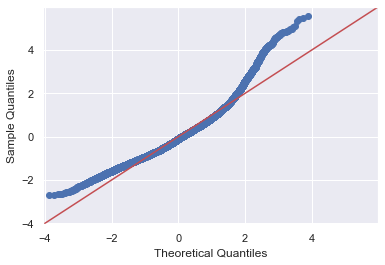

In [608]:
def explore_normality_qqplots(column):
    """ Display qq plot for column in datafile df
    Arguments:
        column - string - data column to create box plot
    Returns: 
    """
    #----------------------------------------------------------------------------------
    #------------Check the normality assumptions by creating a QQ-plot
    #---------------------------------------------------------------------------------- 
    import scipy.stats as stats
    f = 'price~' + column
    model = smf.ols(formula=f, data=df).fit()
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    fig.show()

# for column in df:
#     explore_normality_qqplots(column)   

# Explore further columns of interest after above normalisation results
explore_normality_qqplots('sqft_living')

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


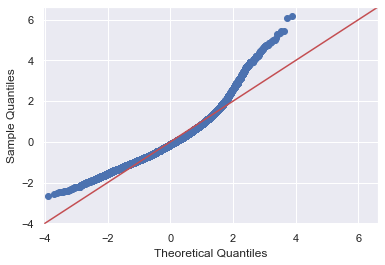

In [609]:
# Explore further columns of interest after above normalisation results
explore_normality_qqplots('grade')

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


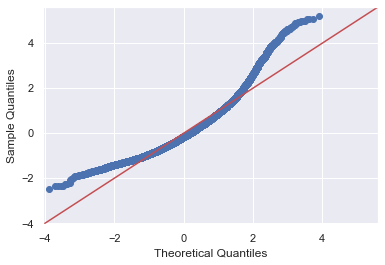

In [610]:
# Explore further columns of interest after above normalisation results
explore_normality_qqplots('bathrooms')

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


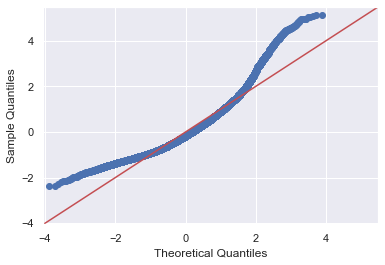

In [611]:
explore_normality_qqplots('bedrooms')

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


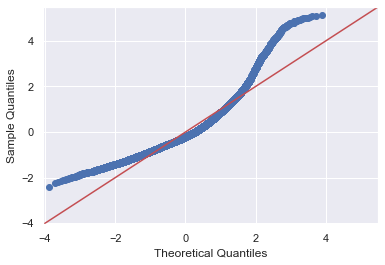

In [612]:
explore_normality_qqplots('lat')

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


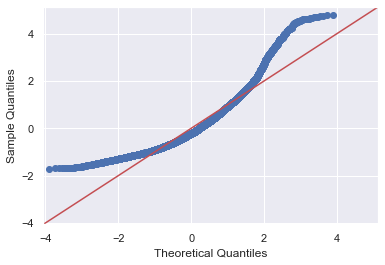

In [613]:
explore_normality_qqplots('long')

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


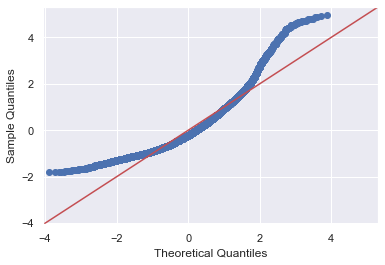

In [614]:
explore_normality_qqplots('YRBLT_1951_1975')

___
## Observations

#### Normality Assumptions with QQ Plots

##### Question:  Which variables show a positive relationship with target?
Those variables in the qq plot which show a closer relationship to the regression line.  As they skew away from the regression line, the variance and standard deviation becomes larger and the relationship becomes less.

After removing outliers outside the min and max of the boxplots of these values, standardising them through log and min/max standardistion the relationships still show variance on both tails of the qq plots. There is room to further normalise the predictor variables.

___

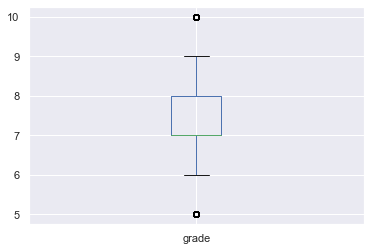

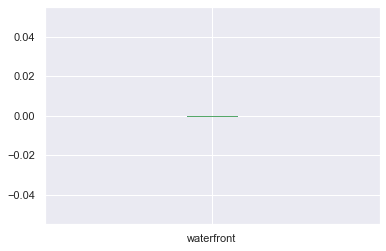

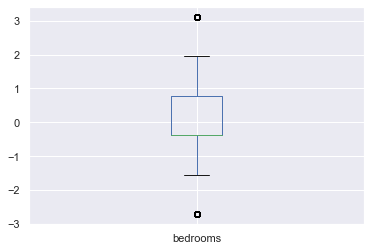

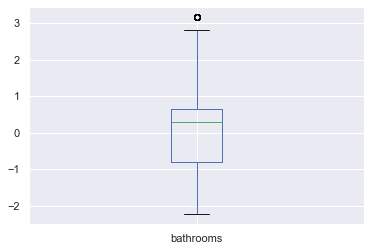

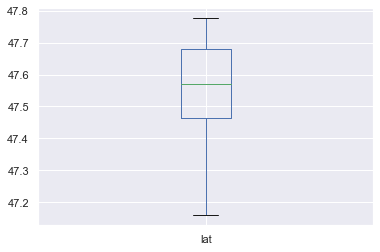

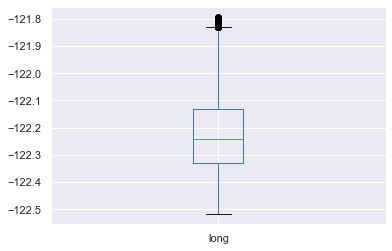

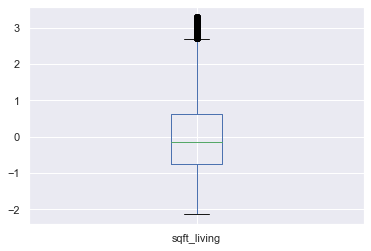

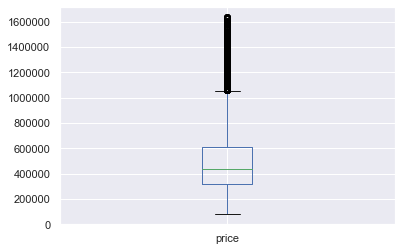

In [615]:
def explore_outliers_boxplot(column):
    """ Display boxplot for column in datafile df
    Arguments:
        column - string - data column to create box plot
    Returns: 
    """
    #----------------------------------------------------------------------------------
    #------------Look for outliers on predictor column
    #
    #---------------------------------------------------------------------------------- 
    plt.figure()
    df[column].plot.box()
    
#for column in df:
explore_outliers_boxplot('grade')
explore_outliers_boxplot('waterfront')
explore_outliers_boxplot('bedrooms')
explore_outliers_boxplot('bathrooms')
explore_outliers_boxplot('lat')
explore_outliers_boxplot('long')
explore_outliers_boxplot('sqft_living')
explore_outliers_boxplot('price')

___
## Observations

### Box Plots and Outliers

#### Question:  Which variables show outliers in the box plot?
Those variables that display values on the box plot outside of the min/max and interquartile range.

Remove outliers to cut tails on data and normalise
Price has a number of outliers at the positive right tail but keeping and will acknowledge this in the non-technical presentation.  Consider presenting model against price with outliers and model of price without outilers, depending on audience requirements on price.

___

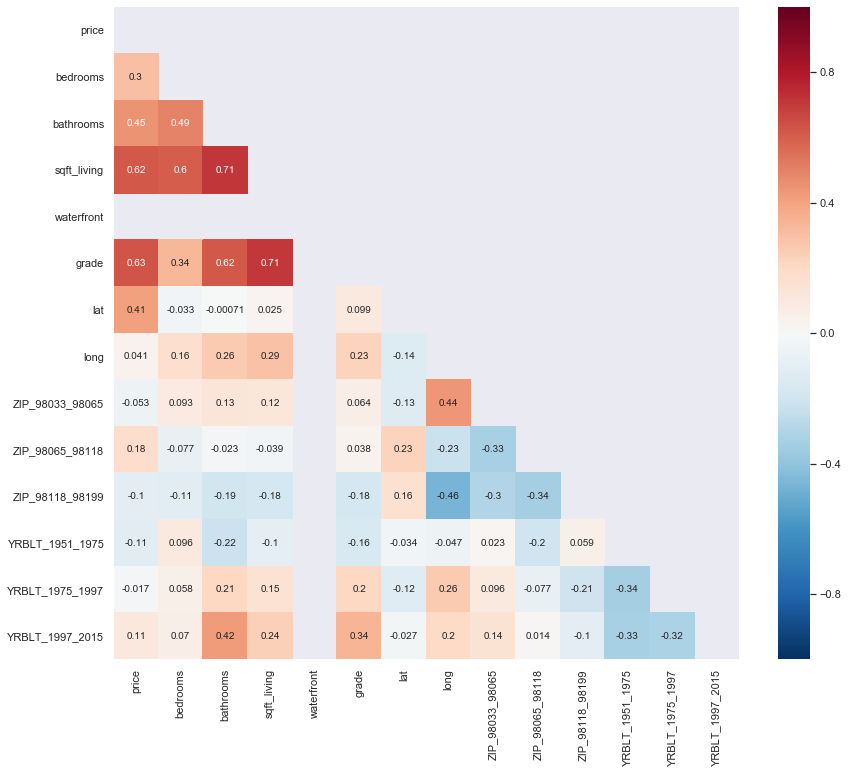

In [616]:
def explore_multicolinearity():
    """ Display multicolinearity graph for df
    Arguments:
        
    Returns: 
    """
    #----------------------------------------------------------------------------------
    #------------Check for multi-colinearity 
    #
    #---------------------------------------------------------------------------------- 
    import seaborn as sns
    correlation = df.corr()
    plt.figure(figsize=(14, 12))
    mask = np.zeros_like(correlation, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True
    heatmap = sns.heatmap(correlation, mask=mask, annot=True,vmin=-1, linewidths=0, cmap="RdBu_r")
    abs(df.corr())>0.75
    
    
explore_multicolinearity()

___
## Observations

### Multicollinearity

#### Question:  Which variables have a higher correlation with target and each other?
Those variables that have larger than 0.75 relationship in the multi-collinearity graph.

price and sqft_living have a 0.7 collinearity - keep sqft_living as it has the highest correlation to target price

sqft_above and grade have a 0.76 collinearity with each other - drop sqft_above as keeping sqft_living which is equal to sqft_basement + sqft_above

sqft_living and sqft_living_15 have a 0.76 collinearity - drop sqft_living_15 as preferred normalization of        sqft_living

sqft_living and sqft_above have a 0.88 collinearity - drop sqft_above as preferred normalization of sqft_living, also sqft_above + sqft_basement = sqft_living, drop sqft_basement

sqft_living and grade have a 0.76 collinearity - keeping grade out of further interest

sqft_living and bathrooms have a 0.76 collinearity - drop bathrooms, keep bedrooms as collinearity is only 0.58

___


In [617]:
#----------------------------------------------------------------------------------
#------------Run a simple regression in Statsmodels with price as target and column as a predictor
#
#---------------------------------------------------------------------------------- 
# build initial trial formula based on assumptions of normalisation and best fit in explore phase
f = 'price~sqft_living+grade+bedrooms+bathrooms+waterfront+lat'
# create a fitted model in one line
model = smf.ols(formula=f, data=df).fit()
#Get Regression Diagnostics Summary
model.summary()

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     5961.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:47:29   Log-Likelihood:            -2.7163e+05
No. Observations:               20331   AIC:                         5.433e+05
Df Residuals:                   20325   BIC:                         5.433e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.981e+07   3.66e+05    -81.335      0.000   -3.05e+07   -2.91e+07
sqft_living  1.056e+05   1951.969     54.106      0.000    1.02e+05    1.09e+05
grade        7.717e+04   1588.870     48.569      0.000    7.41e+04    8.03e+04
bedrooms    -9194.5299   1386.713     -6.630      0.000   -1.19e+04   -6476.460
bathrooms   -1.009e+04   1597.822     -6.315      0.000   -1.32e+04   -6957.687
waterfront           0          0        nan        nan           0           0
lat          6.248e+05   7730.574     80.828      0.000     6.1e+05     6.4e+05
==============================================================================
Omnibus:                     5821.818   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21382.652
Skew:                           1.407   Prob(JB):                         0.00
Kurtosis:                       7.162   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

___
## Observations

### Simple Regression

Kurtosis is high in first iteration (needs to be <=3)
Skew is less than 3 (needs to be <=3, moving towards 0)
P value is low at 0
R Squared is above 57.5%, slightly above average

##### Question: What would be more towards an ideal regression result?
R-Squared > 0.6
Kurtosis < 3
Skew closer to 0

Consider stepwise selection and further removing outliers and tails to normalise the data.  Possibly removing outliers on price ?

___


# MODEL

___
### Run Stepwise Selection

In [618]:
# Perform stepwise selection
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [619]:
def stepwise_selection_results():
    """ Call stepwise_selection() and print the results forward-backward feature selection 
    Arguments:
    Returns: none
    """
    X = df
    X = df.drop('price', axis=1)
    y = pd.DataFrame(df, columns=['price'])

    result = stepwise_selection(X, y, verbose = True)
    print('resulting features:')
    print(result)
    
stepwise_selection_results()

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  bathrooms                      with p-value 0.0
Add  lat                            with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grade                          with p-value 0.0
Add  ZIP_98065_98118                with p-value 7.41129e-115
Add  YRBLT_1975_1997                with p-value 5.7679e-93
Add  YRBLT_1997_2015                with p-value 1.6247e-275
Add  YRBLT_1951_1975                with p-value 2.10203e-209
Add  ZIP_98118_98199                with p-value 2.68963e-56
Add  bedrooms                       with p-value 1.64781e-21
Add  long                           with p-value 1.67292e-20
Drop ZIP_98065_98118                with p-value 0.629228
Add  ZIP_98033_98065                with p-value 2.07081e-11
resulting features:
['bathrooms', 'lat', 'sqft_living', 'grade', 'YRBLT_1975_1997', 'YRBLT_1997_2015', 'YRBLT_1951_1975', 'ZIP_98118_98199', 'bedrooms', 'long', 'ZIP_98033_98065']


/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


In [620]:
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
0,221900.0,-0.384188,-1.519320,-1.061925,0.0,7,47.5112,-122.257,0,0,1,1,0,0
1,538000.0,-0.384188,0.285530,0.788593,0.0,7,47.7210,-122.319,0,0,1,0,0,0
2,180000.0,-1.551392,-1.519320,-1.607761,0.0,6,47.7379,-122.233,0,0,0,0,0,0
3,604000.0,0.783016,1.368441,-0.023505,0.0,7,47.5208,-122.393,0,0,1,1,0,0
4,510000.0,-0.384188,-0.075440,-0.396271,0.0,8,47.6168,-122.045,0,1,0,0,1,0


___
## Model 1 - with target [price] outliers
### Run Simple Regression in Statsmodels


In [621]:
# build the formula 
# use predictors recommended by stepwise selection  
cols_to_use =['bathrooms', 'grade', 'sqft_living', 'lat', 'YRBLT_1975_1997', 'YRBLT_1997_2015', 'YRBLT_1951_1975', 'ZIP_98118_98199', 'ZIP_98033_98065', 'bedrooms', 'long']

predictors = '+'.join(cols_to_use)
f = 'price~' +predictors
model = smf.ols(formula=f, data=df).fit()

#Get Regression Diagnostics Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     3585.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:47:30   Log-Likelihood:            -2.6984e+05
No. Observations:               20331   AIC:                         5.397e+05
Df Residuals:                   20319   BIC:                         5.398e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.483e+07   1.25e+06    -27.910      0.000   -3.73e+07   -3.24e+07
bathrooms         2.35e+04   1651.752     14.227      0.000    2.03e+04    2.67e+04
grade            1.004e+05   1543.377     65.023      0.000    9.73e+04    1.03e+05
sqft_living      9.168e+04   1850.188     49.551      0.000    8.81e+04    9.53e+04
lat              5.334e+05   7386.037     72.222      0.000    5.19e+05    5.48e+05
YRBLT_1975_1997 -1.718e+05   3510.769    -48.933      0.000   -1.79e+05   -1.65e+05
YRBLT_1997_2015 -1.767e+05   3756.481    -47.050      0.000   -1.84e+05   -1.69e+05
YRBLT_1951_1975 -9.625e+04   2942.904    -32.705      0.000   -1.02e+05   -9.05e+04
ZIP_98118_98199 -6.344e+04   2690.932    -23.574      0.000   -6.87e+04   -5.82e+04
ZIP_98033_98065 -1.789e+04   2668.293     -6.705      0.000   -2.31e+04   -1.27e+04
bedrooms        -1.273e+04   1304.724     -9.758      0.000   -1.53e+04   -1.02e+04
long            -7.627e+04   9803.413     -7.780      0.000   -9.55e+04   -5.71e+04
==============================================================================
Omnibus:                     5324.184   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21232.851
Skew:                           1.253   Prob(JB):                         0.00
Kurtosis:                       7.334   Cond. No.                     1.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [622]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,waterfront,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
count,2.033100e+04,2.033100e+04,2.033100e+04,2.033100e+04,20331.0,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000
mean,4.930752e+05,-8.004789e-16,3.686829e-15,-3.859979e-16,0.0,7.544882,47.559305,-122.220640,0.228715,0.272195,0.233338,0.262899,0.245487,0.236437
std,2.410595e+05,1.000025e+00,1.000025e+00,1.000025e+00,0.0,1.009444,0.140548,0.131662,0.420015,0.445101,0.422966,0.440219,0.430386,0.424904
min,7.800000e+04,-2.718596e+00,-2.241260e+00,-2.140284e+00,0.0,5.000000,47.159300,-122.519000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.170000e+05,-3.841881e-01,-7.973796e-01,-7.557243e-01,0.0,7.000000,47.465500,-122.331000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.400000e+05,-3.841881e-01,2.855305e-01,-1.433227e-01,0.0,7.000000,47.571500,-122.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.130000e+05,7.830159e-01,6.465005e-01,6.275045e-01,0.0,8.000000,47.679700,-122.131000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.640000e+06,3.117424e+00,3.173291e+00,3.304765e+00,0.0,10.000000,47.777600,-121.792000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [623]:
print('Mean of price ' + str(np.round(4.930752e+05)))
print('Mean of bedrooms ' + str(np.round(-8.004789e-16)))
print('Mean of bathrooms ' + str(np.round(3.686829e-15)))
print('Mean of sqft_living ' + str(np.round(-3.859979e-16)))
print('Mean of grade ' + str(np.round(7.544882)))
print('Mean of latitude ' + str(np.round(47.559305)))

Mean of price 493075.0
Mean of bedrooms -0.0
Mean of bathrooms 0.0
Mean of sqft_living -0.0
Mean of grade 8.0
Mean of latitude 48.0


In [624]:
model.params.round()

Intercept         -34827830.0
bathrooms             23500.0
grade                100354.0
sqft_living           91678.0
lat                  533434.0
YRBLT_1975_1997     -171794.0
YRBLT_1997_2015     -176741.0
YRBLT_1951_1975      -96249.0
ZIP_98118_98199      -63437.0
ZIP_98033_98065      -17890.0
bedrooms             -12732.0
long                 -76273.0
dtype: float64

In [625]:
print('min price:  ' + str(np.round(7.800000e+04)))
print('max price:  ' + str(np.round(1.640000e+06)))
print('mean price:  ' + str(np.round(4.930752e+05)))

min price:  78000.0
max price:  1640000.0
mean price:  493075.0


___
### Regression Diagnostic Analysis

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Regression Analysis and Diagnostics for formula: price~bathrooms
-------------------------------------------------------------------------------------


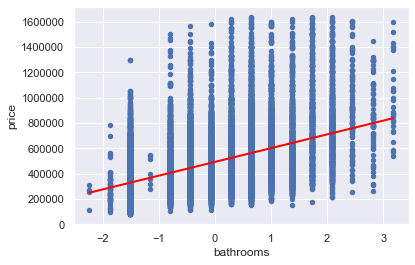

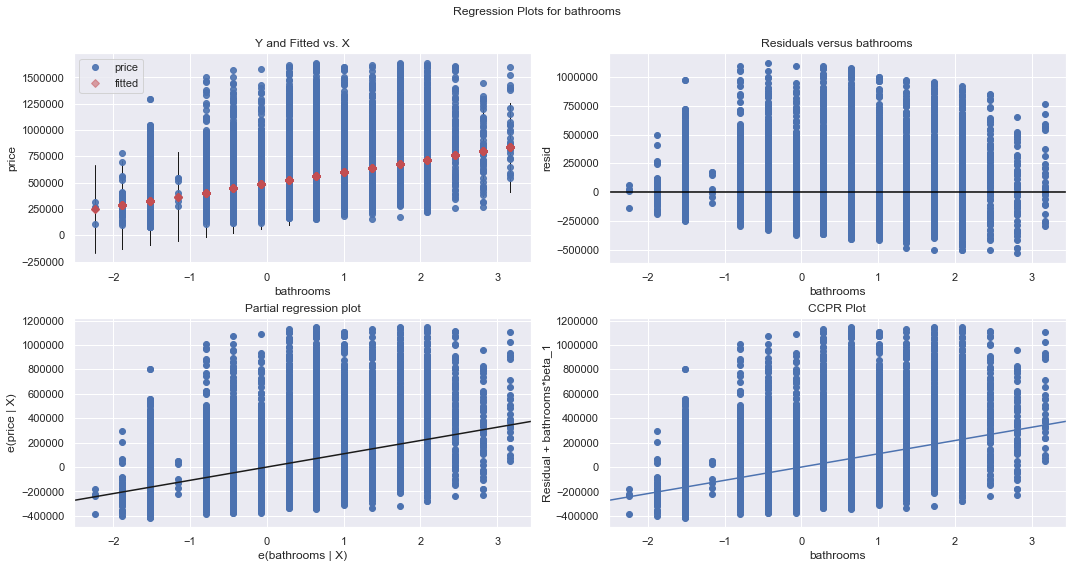

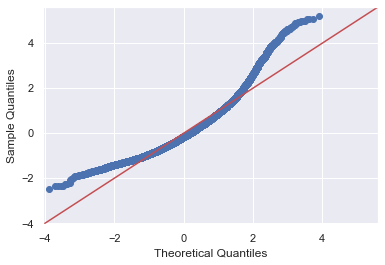

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Regression Analysis and Diagnostics for formula: price~grade
-------------------------------------------------------------------------------------


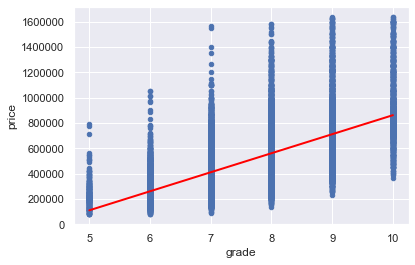

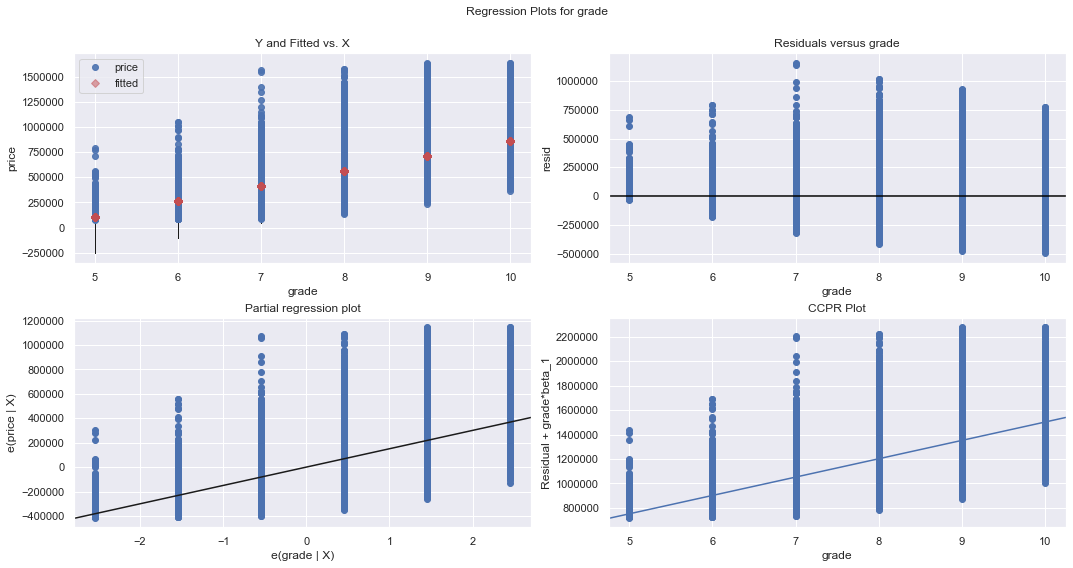

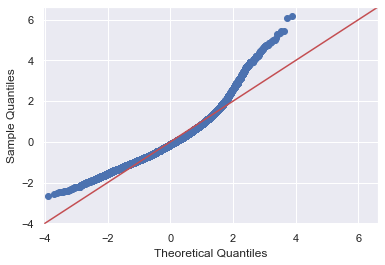

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Regression Analysis and Diagnostics for formula: price~sqft_living
-------------------------------------------------------------------------------------


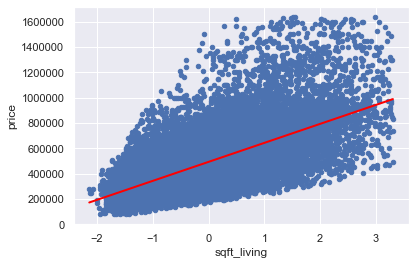

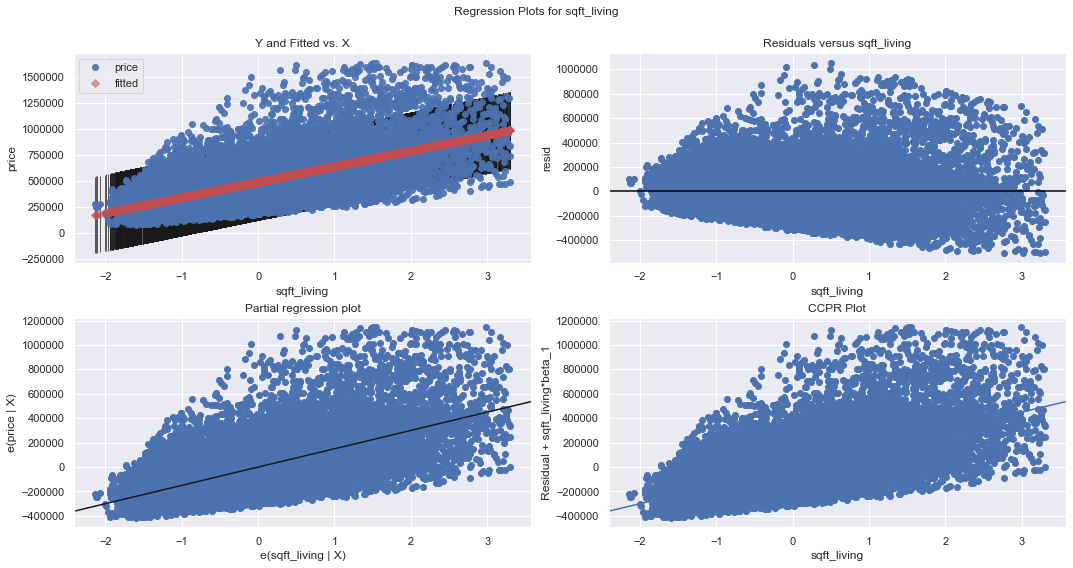

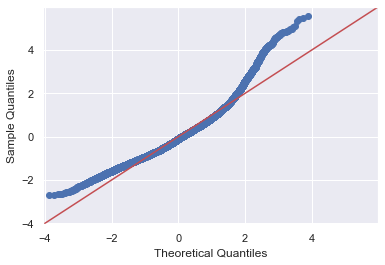

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Regression Analysis and Diagnostics for formula: price~lat
-------------------------------------------------------------------------------------


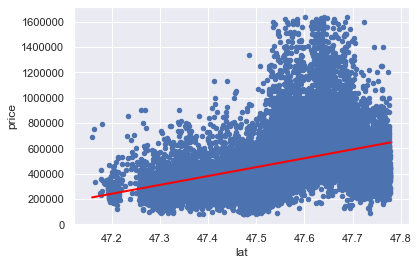

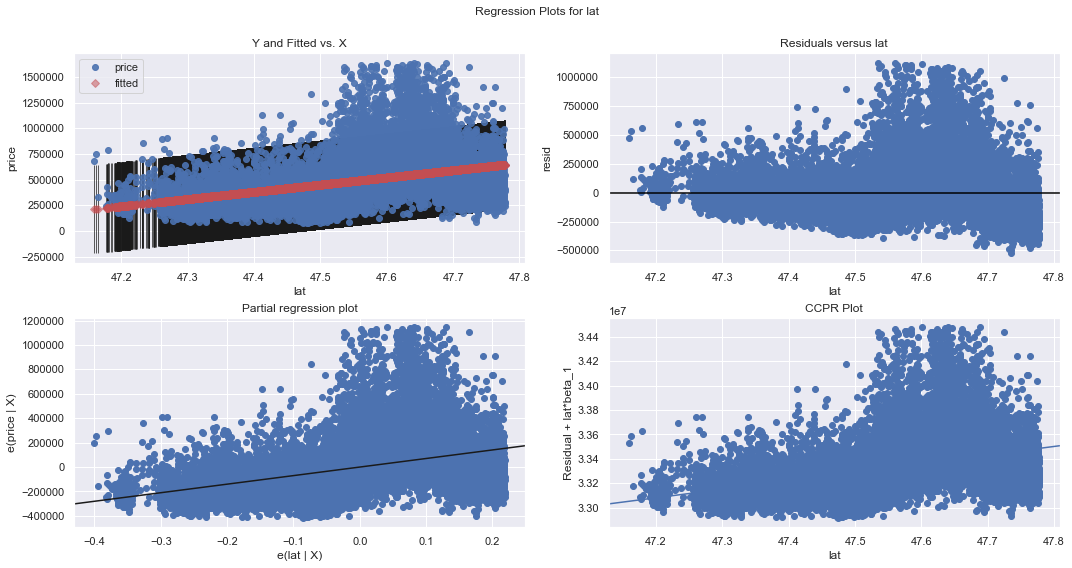

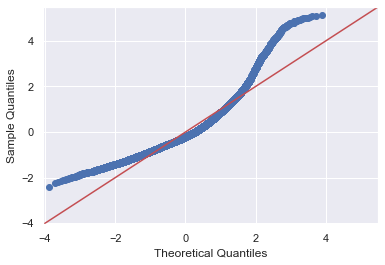

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Regression Analysis and Diagnostics for formula: price~YRBLT_1975_1997
-------------------------------------------------------------------------------------


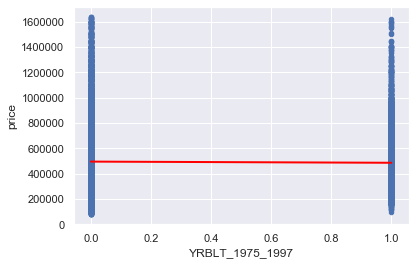

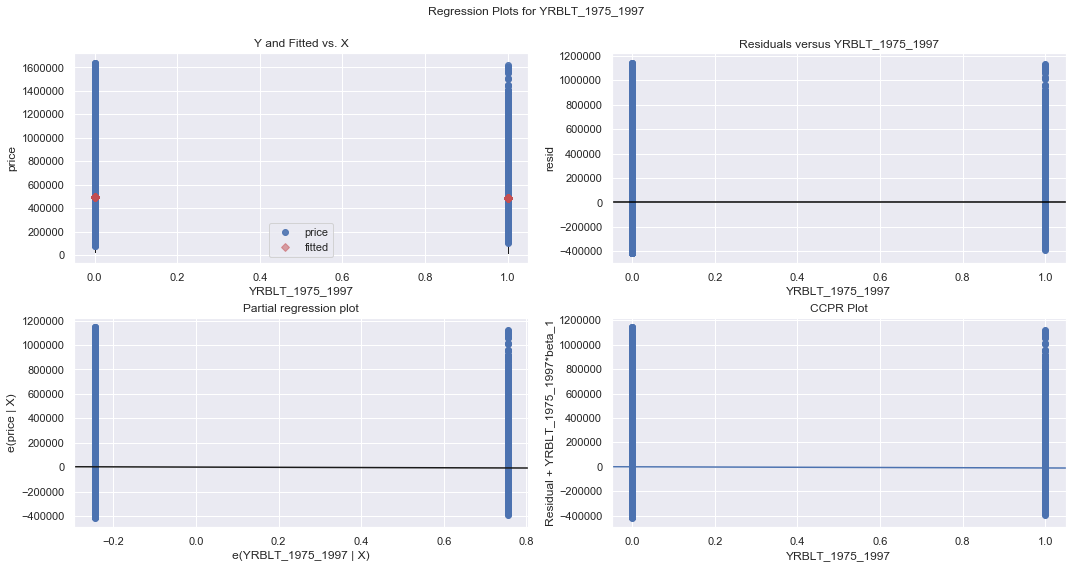

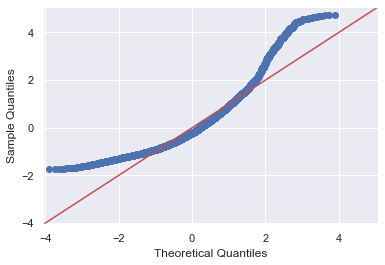

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Regression Analysis and Diagnostics for formula: price~YRBLT_1997_2015
-------------------------------------------------------------------------------------


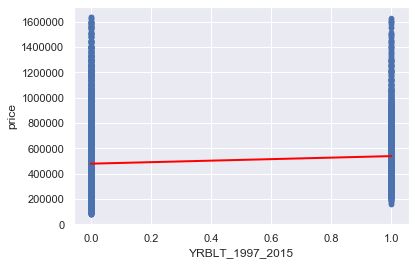

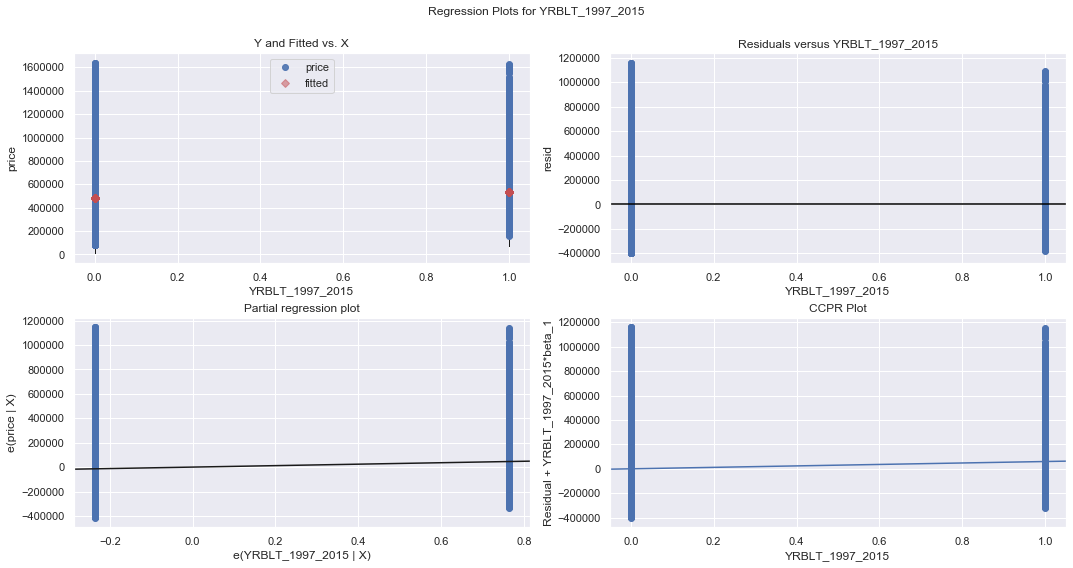

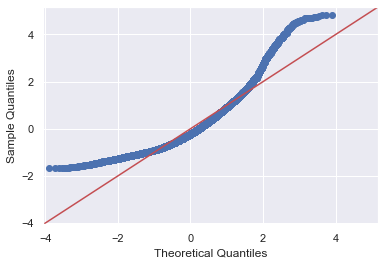

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Regression Analysis and Diagnostics for formula: price~YRBLT_1951_1975
-------------------------------------------------------------------------------------


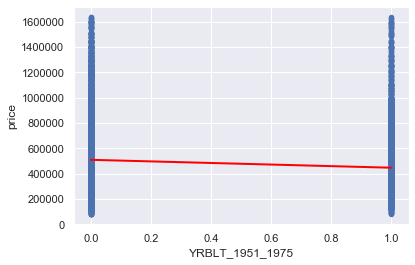

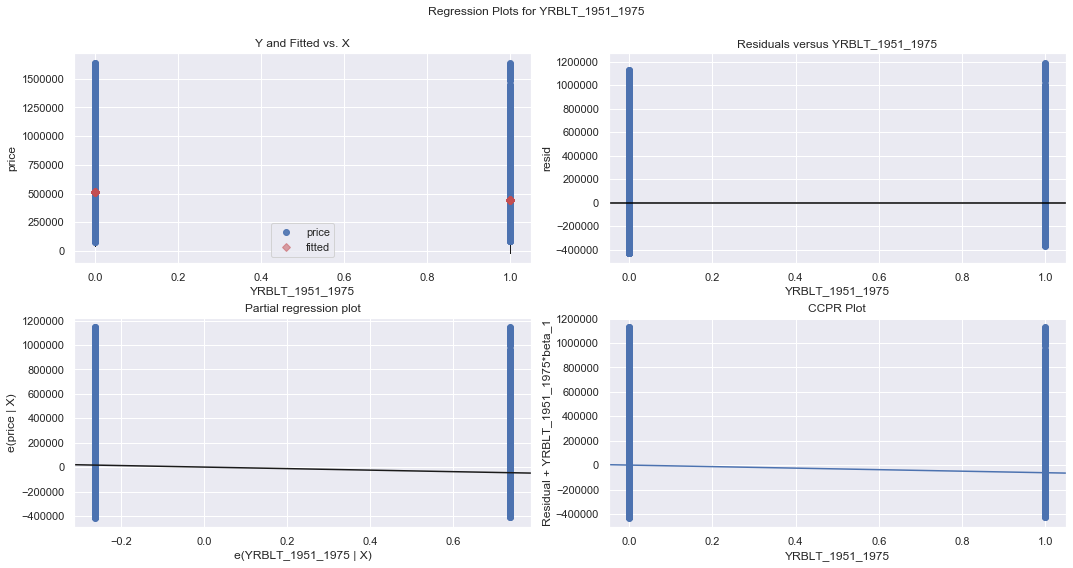

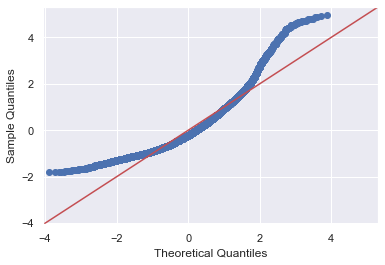

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Regression Analysis and Diagnostics for formula: price~ZIP_98118_98199
-------------------------------------------------------------------------------------


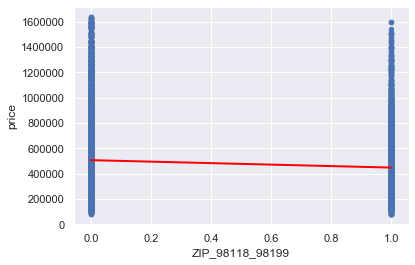

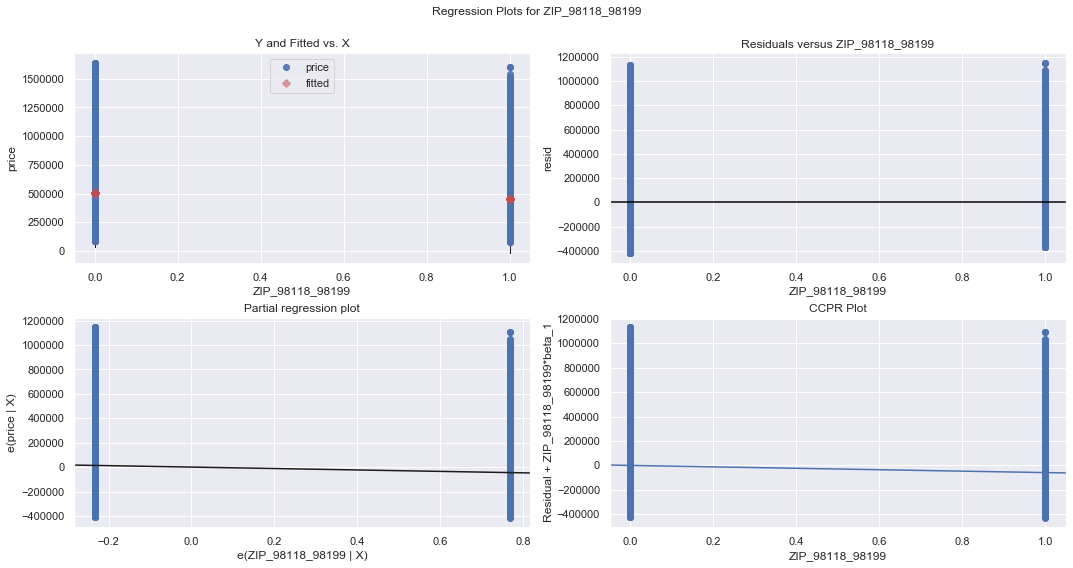

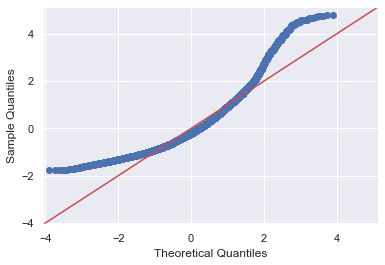

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Regression Analysis and Diagnostics for formula: price~ZIP_98033_98065
-------------------------------------------------------------------------------------


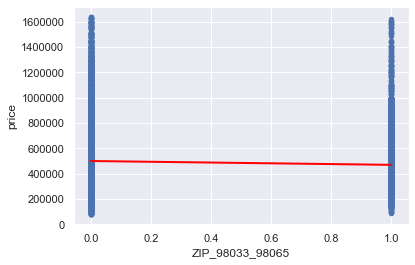

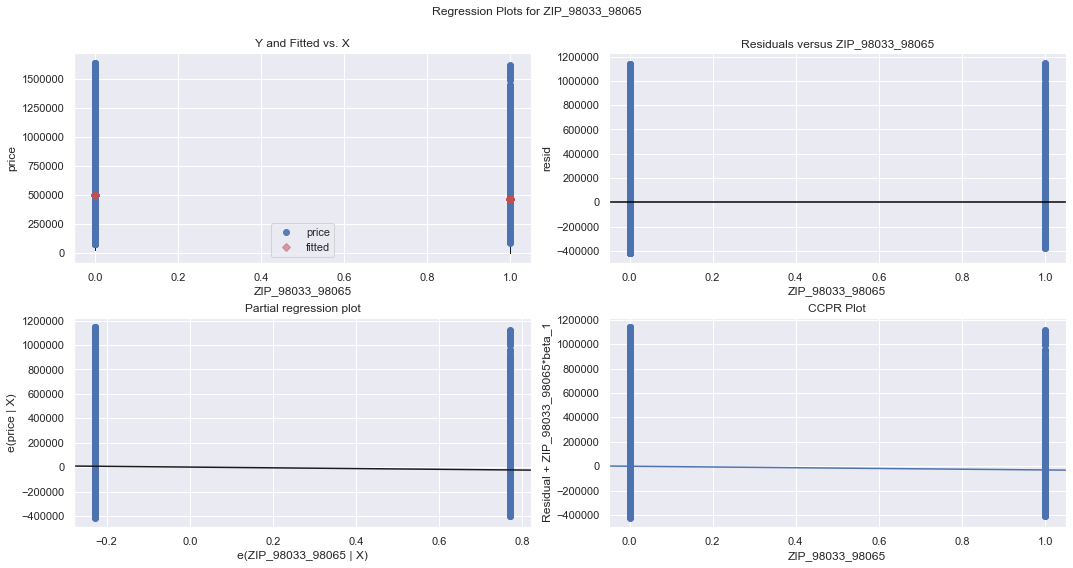

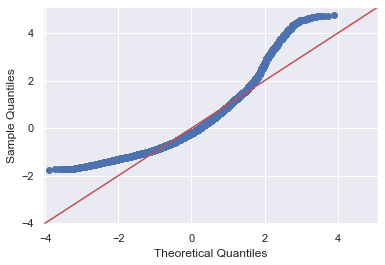

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Regression Analysis and Diagnostics for formula: price~bedrooms
-------------------------------------------------------------------------------------


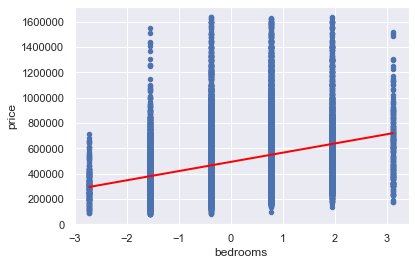

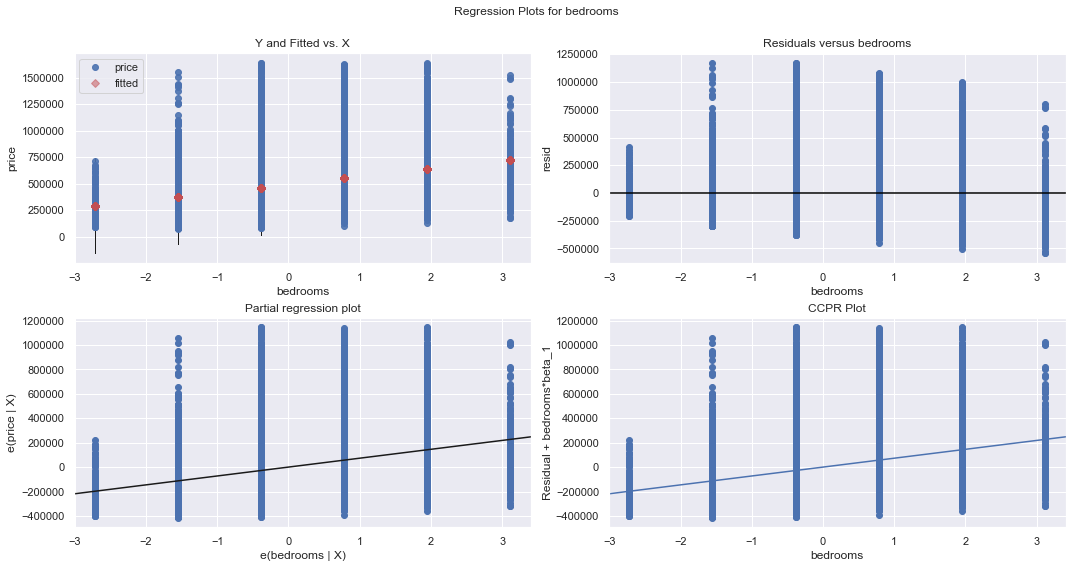

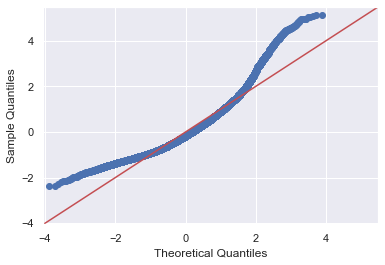

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Regression Analysis and Diagnostics for formula: price~long
-------------------------------------------------------------------------------------


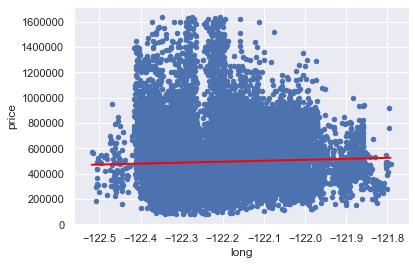

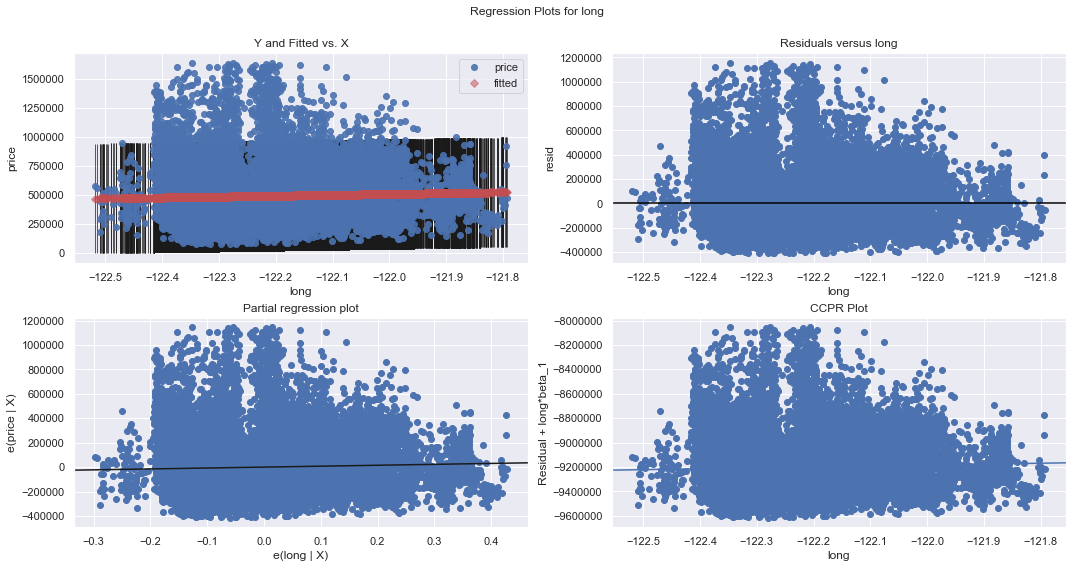

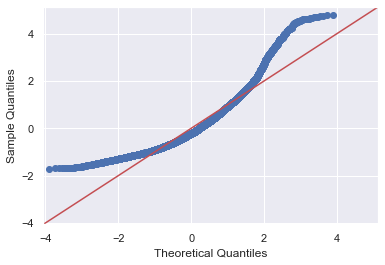

Press Enter to continue...


In [626]:
# import libraries
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import scipy.stats as stats
# import statsmodels.stats.api as sms

# Run a simple OLS regression between independent and dependent variables
# Plot a regression line on the scatter plots
# Plot the residuals using sm.graphics.plot_regress_exog()
# Plot a Q-Q plot for regression residuals normality test
# Store following values in array for each iteration:
# Independent Variable
# r_squared'
# intercept'
# 'slope'
# 'p-value'
# 'normality (JB)'
# Comment on each output

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['bathrooms', 'grade', 'sqft_living', 'lat', 'YRBLT_1975_1997', 'YRBLT_1997_2015', 'YRBLT_1951_1975', 'ZIP_98118_98199', 'ZIP_98033_98065', 'bedrooms', 'long']):
    print ("Regression Analysis and Diagnostics for formula: price~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val
   
    model = smf.ols(formula=f, data=df).fit()
    
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    df.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")

___
## Observations

### Regression Diagnostic Analysis

All the selected variables for the model show a positive relationship with the target price however there is room to reduce the variance by further normalising the variables and removing further outliers.

The above regression model was run on the target price variable which had outliers.

The decision made is to keep this example of data with the price target's outliers and present the analysis to the non technical audience as well as run the same model but with the outliers removed from the target price.


___
### Train Test Model

In [627]:
X = df[['bathrooms', 'grade', 'sqft_living', 'lat', 'YRBLT_1975_1997', 'YRBLT_1997_2015', 'YRBLT_1951_1975', 'ZIP_98118_98199', 'ZIP_98033_98065', 'bedrooms', 'long']]
y = pd.DataFrame(df.price, columns = ['price'])
type(X)

pandas.core.frame.DataFrame

In [628]:
from sklearn.model_selection import train_test_split

In [629]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train = pd.DataFrame(X_train, columns=X.columns)
y_train = pd.DataFrame(y_train, columns=y.columns)

In [630]:
# A brief preview of train-test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16264 4067 16264 4067


In [631]:
df_train=pd.concat([X_train,y_train], axis=1)


In [632]:
# use predictors recommended by stepwise selection  
cols_to_use =['bathrooms', 'grade', 'sqft_living', 'lat', 'YRBLT_1975_1997', 'YRBLT_1997_2015', 'YRBLT_1951_1975', 'ZIP_98118_98199', 'ZIP_98033_98065', 'bedrooms', 'long']


predictors = '+'.join(cols_to_use)
f = 'price~' +predictors


model = smf.ols(formula=f, data=df_train).fit()
#Get Regression Diagnostics Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2862.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:48:49   Log-Likelihood:            -2.1582e+05
No. Observations:               16264   AIC:                         4.317e+05
Df Residuals:                   16252   BIC:                         4.318e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -3.51e+07   1.39e+06    -25.244      0.000   -3.78e+07   -3.24e+07
bathrooms        2.318e+04   1838.291     12.611      0.000    1.96e+04    2.68e+04
grade            9.928e+04   1720.892     57.693      0.000    9.59e+04    1.03e+05
sqft_living      9.131e+04   2048.337     44.576      0.000    8.73e+04    9.53e+04
lat              5.322e+05   8225.897     64.696      0.000    5.16e+05    5.48e+05
YRBLT_1975_1997 -1.708e+05   3910.105    -43.690      0.000   -1.78e+05   -1.63e+05
YRBLT_1997_2015 -1.759e+05   4175.450    -42.128      0.000   -1.84e+05   -1.68e+05
YRBLT_1951_1975 -9.765e+04   3273.220    -29.833      0.000   -1.04e+05   -9.12e+04
ZIP_98118_98199 -6.409e+04   2995.405    -21.396      0.000      -7e+04   -5.82e+04
ZIP_98033_98065 -1.773e+04   2983.268     -5.944      0.000   -2.36e+04   -1.19e+04
bedrooms        -1.213e+04   1448.754     -8.370      0.000    -1.5e+04   -9286.985
long            -7.907e+04   1.09e+04     -7.242      0.000      -1e+05   -5.77e+04
==============================================================================
Omnibus:                     4311.809   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17308.645
Skew:                           1.266   Prob(JB):                         0.00
Kurtosis:                       7.374   Cond. No.                     1.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [633]:
#Setup the test model (20%) of the data
y_predict=model.predict(X_test)   #20% model
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_predict)
print(r2)

0.6613173601679799


In [634]:
#Setup the train model (80%) of the data
y_train_predict=model.predict(X_train)  
from sklearn.metrics import r2_score
r2=r2_score(y_train, y_train_predict)
print(r2)

0.659557059822369


___
## Observations

### Train Test

Test model R2 value is 0.6361920485812046
Train model R2 value is 0.6498737821483636
Actual model R2 value is 0.650

The resulting train test results were in line with the actual model value given for this test run.

___
## Model 2 - after removing target [price] outliers
### Run Simple Regression in Statsmodels

In [635]:
df['price'].describe()

count    2.033100e+04
mean     4.930752e+05
std      2.410595e+05
min      7.800000e+04
25%      3.170000e+05
50%      4.400000e+05
75%      6.130000e+05
max      1.640000e+06
Name: price, dtype: float64

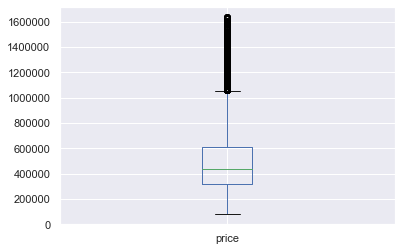

In [636]:
#remove target price outliers
explore_outliers_boxplot('price')
idx = scrub_find_remove_outliers(df['price'])
idx
df = df.loc[idx==False]

In [637]:
display(df.loc[idx==True].describe().round(3))
display(df.loc[idx==False].describe().round(3))

,price,bedrooms,bathrooms,sqft_living,waterfront,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,price,bedrooms,bathrooms,sqft_living,waterfront,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
count,19966.000,19966.000,19966.000,19966.000,19966.0,19966.000,19966.000,19966.000,19966.000,19966.000,19966.000,19966.000,19966.000,19966.000
mean,476882.257,-0.014,-0.021,-0.030,0.0,7.515,47.558,-122.220,0.230,0.271,0.234,0.263,0.247,0.236
std,210496.148,0.995,0.989,0.977,0.0,0.988,0.141,0.132,0.421,0.444,0.423,0.440,0.431,0.425
min,78000.000,-2.719,-2.241,-2.140,0.0,5.000,47.159,-122.519,0.000,0.000,0.000,0.000,0.000,0.000
25%,315000.000,-0.384,-0.797,-0.769,0.0,7.000,47.461,-122.331,0.000,0.000,0.000,0.000,0.000,0.000
50%,436000.000,-0.384,-0.075,-0.170,0.0,7.000,47.569,-122.238,0.000,0.000,0.000,0.000,0.000,0.000
75%,600000.000,0.783,0.647,0.589,0.0,8.000,47.680,-122.129,0.000,1.000,0.000,1.000,0.000,0.000
max,1210000.000,3.117,3.173,3.305,0.0,10.000,47.778,-121.792,1.000,1.000,1.000,1.000,1.000,1.000


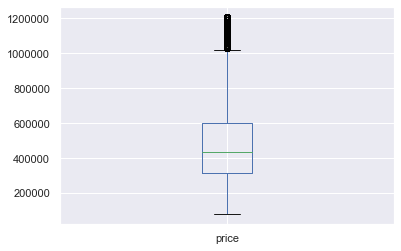

In [638]:
explore_outliers_boxplot('price')

In [639]:
display(df['price'].describe())

count    1.996600e+04
mean     4.768823e+05
std      2.104961e+05
min      7.800000e+04
25%      3.150000e+05
50%      4.360000e+05
75%      6.000000e+05
max      1.210000e+06
Name: price, dtype: float64

In [640]:
print('min price:  ' + str(np.round(7.800000e+04)))
print('max price:  ' + str(np.round(1.210000e+06)))
print('mean price:  ' + str(np.round(4.768823e+05)))

min price:  78000.0
max price:  1210000.0
mean price:  476882.0


/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


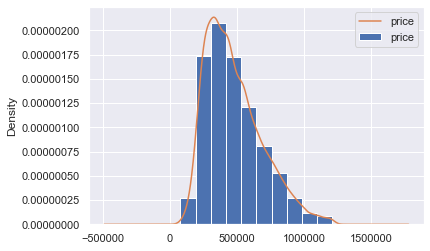

In [641]:
explore_normality_hist_kde('price')

In [642]:
stepwise_selection_results()

/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Add  bathrooms                      with p-value 0.0
Add  lat                            with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grade                          with p-value 0.0
Add  ZIP_98065_98118                with p-value 6.9719e-145
Add  YRBLT_1975_1997                with p-value 6.93623e-70
Add  YRBLT_1997_2015                with p-value 9.10195e-215
Add  YRBLT_1951_1975                with p-value 3.08164e-217
Add  ZIP_98118_98199                with p-value 5.56046e-65
Add  ZIP_98033_98065                with p-value 1.07218e-18
Add  bedrooms                       with p-value 1.9458e-16
Drop ZIP_98065_98118                with p-value 0.0555602
Add  long                           with p-value 0.00464739
resulting features:
['bathrooms', 'lat', 'sqft_living', 'grade', 'YRBLT_1975_1997', 'YRBLT_1997_2015', 'YRBLT_1951_1975', 'ZIP_98118_98199', 'ZIP_98033_98065', 'bedrooms', 'long']


/Users/SusannaVSyassen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


In [643]:
# build the formula 
# use predictors recommended by stepwise selection  
cols_to_use =['bathrooms', 'grade', 'sqft_living', 'lat', 'YRBLT_1975_1997', 'YRBLT_1997_2015', 'YRBLT_1951_1975', 'ZIP_98118_98199', 'ZIP_98033_98065', 'bedrooms', 'long']

predictors = '+'.join(cols_to_use)
f = 'price~' +predictors
model = smf.ols(formula=f, data=df).fit()

#Get Regression Diagnostics Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     3651.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:48:53   Log-Likelihood:            -2.6205e+05
No. Observations:               19966   AIC:                         5.241e+05
Df Residuals:                   19954   BIC:                         5.242e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.808e+07   1.09e+06    -25.876      0.000   -3.02e+07    -2.6e+07
bathrooms        1.931e+04   1444.754     13.365      0.000    1.65e+04    2.21e+04
grade            8.783e+04   1355.865     64.781      0.000    8.52e+04    9.05e+04
sqft_living      8.092e+04   1625.865     49.768      0.000    7.77e+04    8.41e+04
lat               5.27e+05   6383.986     82.558      0.000    5.15e+05     5.4e+05
YRBLT_1975_1997 -1.476e+05   3082.741    -47.887      0.000   -1.54e+05   -1.42e+05
YRBLT_1997_2015 -1.507e+05   3313.601    -45.493      0.000   -1.57e+05   -1.44e+05
YRBLT_1951_1975 -9.032e+04   2570.448    -35.138      0.000   -9.54e+04   -8.53e+04
ZIP_98118_98199 -5.745e+04   2341.879    -24.533      0.000    -6.2e+04   -5.29e+04
ZIP_98033_98065 -2.226e+04   2322.462     -9.583      0.000   -2.68e+04   -1.77e+04
bedrooms        -9497.7663   1140.424     -8.328      0.000   -1.17e+04   -7262.440
long            -2.413e+04   8524.329     -2.831      0.005   -4.08e+04   -7422.531
==============================================================================
Omnibus:                     2548.951   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5494.849
Skew:                           0.780   Prob(JB):                         0.00
Kurtosis:                       5.043   Cond. No.                     1.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [644]:
model.params.round()

Intercept         -28080647.0
bathrooms             19309.0
grade                 87834.0
sqft_living           80916.0
lat                  527047.0
YRBLT_1975_1997     -147622.0
YRBLT_1997_2015     -150745.0
YRBLT_1951_1975      -90321.0
ZIP_98118_98199      -57452.0
ZIP_98033_98065      -22256.0
bedrooms              -9498.0
long                 -24131.0
dtype: float64

# iNTERPRET

### Model 1 - with target [price] outliers
The price values range between 
The value ranges is as follows:
min price:  78000.0
max price:  1640000.0
mean price:  493075.0

##### Predictors with P - Values below 0.05
The predictors with p-value less than the significance level of 0.05 were added to the model.
This sample data provides enough evidence to reject the null hypothesis for the entire population. 
This data favors the hypothesis that there is a non-zero correlation. 
Changes in the independent variable are associated with changes in the response at 
the population level. These variables are statistically significant and probably a worthwhile 
addition to the regression model.

##### Predictors with P - Values above 0.05
The resulting featurs from stepwise selection with a p-value that is greater than the significance level 
indicates that there is insufficient evidence in the sample to conclude that a non-zero correlation exists.
They were hence not added to the list of model predictors for the model.

##### R-squared:	0.647
R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. 100% indicates that the model explains all the variability of the response data around its mean.  This model currently represents a 64.7% fit towards the regression line.

##### Skew:	  1.312	
Skew measures the lack of symmetry in data distribution. A symmetrical distribution will have a skewness of 0. There are two types of Skewness: Positive and Negative. Positive Skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.  In this case, the tail is positively skewed to the right.  I recommend that the tails be further normalised for the predictor
values in order to reduce the skew of this model towards 0.

##### Kurtosis:  7.332
Like skewness, kurtosis is a statistical measure that is used to describe the distribution. Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution.  I recommend that the tails be further normalised for the predictor values in order to reduce the kurtosis of this model towards below 3.

##### Intercept:  -34827830.0
The intercept (often labeled the constant) is the expected mean value of Y when all X=0. Start with a regression equation with one predictor, X. If X sometimes equals 0, the intercept is simply the expected mean value of Y at that value. If X never equals 0, then the intercept has no intrinsic meaning.  Hence in this case, if there were no bathrooms, grade, sqft_living or latitude, there would be no physical property and hence no or a negetive price.

##### Target :  Price
This variable has not been fully normalised and hence is not representative of the entire population.  It is outliers which I would estimate, if removed would help reduce the kurtosis and skew and increase the r2 value.  This is a decision I would have to further make depending on the requirements of the non-technical audience I will be presenting to.

##### Predictor Co-efficient with + positive Values
In finding a positive relationship in increase in price with the predictor, I will propose focusing on these predictor values in the non-technical presentation.

###### bathrooms             23500.0
For each increase in independant variable x value of bathroom added to the house, the dependent variable y price would increase by 23500.0

###### grade                100354.0
For each increase in independant variable x value of grade added to the house, the dependent variable y price would increase by 100354.0

###### sqft_living          91678.0
For each increase independant variable x value of sqft_living added to the house, the dependent variable y price would increase by 91678.0

###### lat                  533434.0
For each increase in independant variable x value of lat added to the house, the dependent variable y price would increase by 533434.0

##### Predictor Co-efficient with - negative Values
For the purposes of this project, in finding a positive relationship in increase in price with the predictor values, I will not be presenting these values for the non-technical presentation:

YRBLT_1975_1997     -171794.0
YRBLT_1997_2015     -176741.0
YRBLT_1951_1975      -96249.0
ZIP_98118_98199      -63437.0
ZIP_98033_98065      -17890.0
bedrooms             -12732.0
long                 -76273.0


### Model 2 - without target [price] outliers

The price values range between The value ranges is as follows:

min price:  78000.0
max price:  1210000.0
mean price:  476882.0

##### R-squared:	0.668

##### Skew:	  0.78	

##### Kurtosis:  5.043

##### Intercept:  -28080647.0

This model has a closer relationship to the target regression line with a lower kurtosis and skew though it showed a very minor increase in R2.

##### Predictor Co-efficient with - negative Values
For the purposes of this project, in finding a positive relationship in increase in price with the predictor values, I will not be presenting these values for the non-technical presentation:

YRBLT_1975_1997     -147622.0
YRBLT_1997_2015     -150745.0
YRBLT_1951_1975      -90321.0
ZIP_98118_98199      -57452.0
ZIP_98033_98065      -22256.0
bedrooms              -9498.0
long                 -24131.0

##### Predictor Co-efficient with + positive Values
In finding a positive relationship in increase in price with the predictor, I will propose focusing on these predictor values in the non-technical presentation.

###### bathrooms            19309.0
For each increase in independant variable x value of bathroom added to the house, the dependent variable y price would increase by 19309.0

###### grade                87834.0
For each increase in independant variable x value of grade added to the house, the dependent variable y price would increase by 87834.0

###### sqft_living          80916.0
For each increase independant variable x value of sqft_living added to the house, the dependent variable y price would increase by 80916.0

###### lat                  527047.0
For each increase in independant variable x value of lat added to the house, the dependent variable y price would increase by 527047.0

# CONCLUSIONS & RECOMMENDATIONS

To propose two model results, depending on the requirements of the non technical audience.  Model 1 having a larger set of outliers and hence is less representative of the population but offers analysis of more expensive house prices and model 2 which has less variance to the regression line.  Both models however have similar output values except for a more obvious decrease in kurtosis and skew on model 2.

Model 1:  Prices with larger outliers with a price range of 
min price:  78000.0
max price:  1640000.0
mean price:  493075.0

Model 2:  Prices with reduced outliers that are closer to having data with a more representative population, 
with a price range of 
min price:  78000.0
max price:  1210000.0
mean price:  476882.0

The values for model 1 may be presented as extra information on house prices up to US$1.64million.
I have chosen however to further present data below from model 2 on house prices up to US$1.21 million  which is more representative of the population.  Both model price data however have very close mean.

## Potential Points of Interest to Present Analysis to Non Technical Audience

### Recommendations for Increasing the House Price

Add Bathrooms
Increase KC Grading
Increase the House Living Area
Move North


### Future Work
For more current recommendations in line with todays’ house prices, we would value KC House Sale Data that is up to date.

KC House Data was not 100% complete, a number of sales transactions had missing detail.


### What is the scope of the data analysed?

In [646]:
df['price'].describe()

count    1.996600e+04
mean     4.768823e+05
std      2.104961e+05
min      7.800000e+04
25%      3.150000e+05
50%      4.360000e+05
75%      6.000000e+05
max      1.210000e+06
Name: price, dtype: float64

### What increases house prices the most?

In [647]:
import seaborn as sns
sns.set_context('poster')

In [648]:
df["bathrooms"].describe()

count    19966.000000
mean        -0.021274
std          0.988936
min         -2.241260
25%         -0.797380
50%         -0.075440
75%          0.646501
max          3.173291
Name: bathrooms, dtype: float64

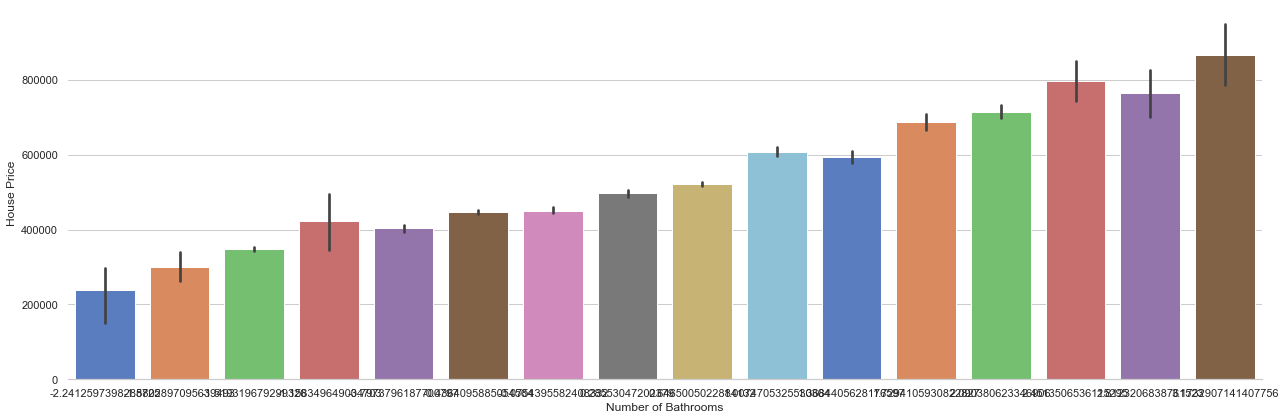

In [649]:
#bathrooms
# Increase in price by bathrooms
sns.set(style="whitegrid")

a4_dims = (11.7, 8.27)
# Draw a nested barplot to show price for bathrooms
g = sns.catplot(x="bathrooms", y="price", data=df,
                height=6, kind="bar", aspect=3, palette="muted")
g.despine(left=True)
g.set_ylabels("House Price")
g.set_xlabels("Number of Bathrooms")

In [650]:
df["grade"].describe()

count    19966.000000
mean         7.514675
std          0.988114
min          5.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: grade, dtype: float64

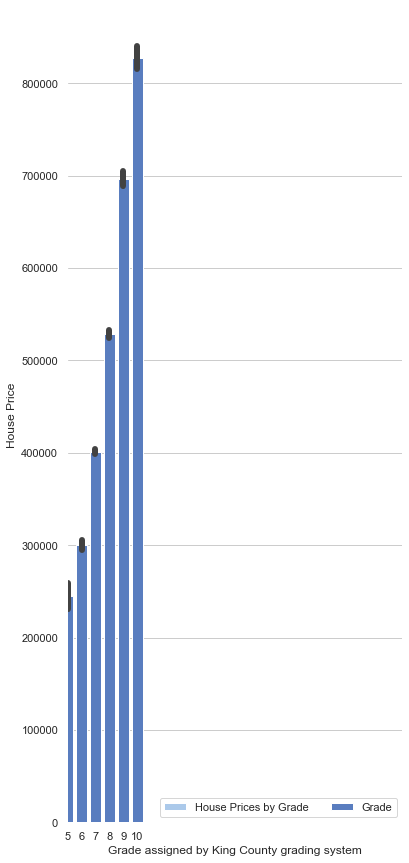

In [659]:
#grade
# Increase in price by grade
sns.set_context('notebook')
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="grade", y="price", data=df,
            label="House Prices by Grade", color="b")

# Plot the crashes where grade is involved
sns.set_color_codes("muted")
sns.barplot(x="grade", y="price", data=df,
            label="Grade", color="b", errwidth=6 )

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="House Price",
       xlabel="Grade assigned by King County grading system")
sns.despine(left=True, bottom=True)


In [652]:
df["sqft_living"].describe()

count    19966.000000
mean        -0.030332
std          0.977360
min         -2.140284
25%         -0.769037
50%         -0.169949
75%          0.588897
max          3.304765
Name: sqft_living, dtype: float64

In [660]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,waterfront,grade,lat,long,ZIP_98033_98065,ZIP_98065_98118,ZIP_98118_98199,YRBLT_1951_1975,YRBLT_1975_1997,YRBLT_1997_2015
count,1.996600e+04,19966.000000,19966.000000,19966.000000,19966.0,19966.000000,19966.000000,19966.000000,19966.000000,19966.000000,19966.000000,19966.000000,19966.000000,19966.000000
mean,4.768823e+05,-0.013964,-0.021274,-0.030332,0.0,7.514675,47.558088,-122.219783,0.229741,0.270660,0.234148,0.262997,0.247371,0.235901
std,2.104961e+05,0.995472,0.988936,0.977360,0.0,0.988114,0.141403,0.132244,0.420676,0.444312,0.423476,0.440272,0.431495,0.424571
min,7.800000e+04,-2.718596,-2.241260,-2.140284,0.0,5.000000,47.159300,-122.519000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.150000e+05,-0.384188,-0.797380,-0.769037,0.0,7.000000,47.461200,-122.331000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.360000e+05,-0.384188,-0.075440,-0.169949,0.0,7.000000,47.569400,-122.238500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000e+05,0.783016,0.646501,0.588897,0.0,8.000000,47.680300,-122.129000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.210000e+06,3.117424,3.173291,3.304765,0.0,10.000000,47.777600,-121.792000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


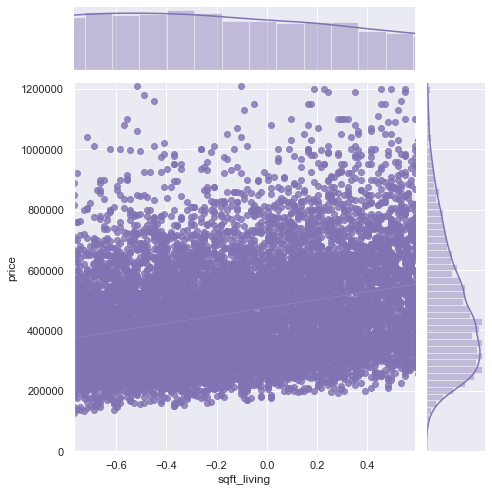

In [661]:
#sqft_living
# Increase in price by sqft_living
sns.set_context('notebook')
sns.set(style="darkgrid")

g = sns.jointplot("sqft_living", "price", data=df, kind="reg",
                  xlim=(-0.769037, 0.588897), ylim=(0, 1220000), color="m", height=7)

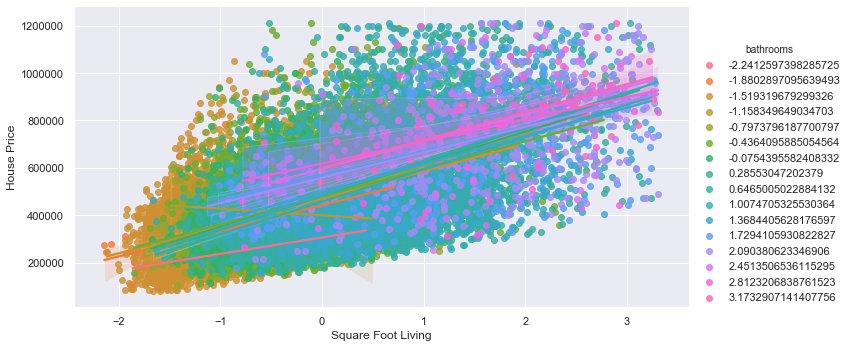

In [654]:
sns.set()
sns.set_context('poster')

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="sqft_living", y="price", hue="bathrooms",
               height=5, truncate=True, data=df, aspect=2 )

# Use more informative axis labels than are provided by default
g.set_axis_labels("Square Foot Living", "House Price")

In [655]:
df["lat"].describe()

count    19966.000000
mean        47.558088
std          0.141403
min         47.159300
25%         47.461200
50%         47.569400
75%         47.680300
max         47.777600
Name: lat, dtype: float64

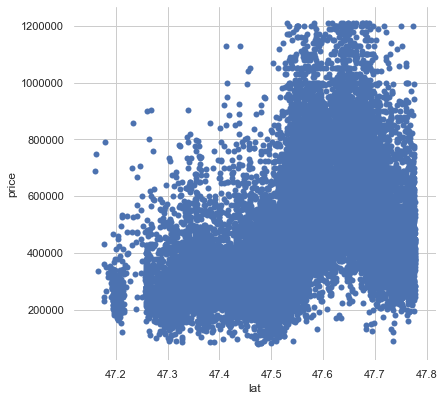

In [656]:
#latitude

# Increase in price by latitude going north
sns.set_context('poster')
sns.set(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="lat", y="price",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

g.set_axis_labels("Latitude", "House Price")

### What are some interesting other findings in the EDA / Other?

In [657]:
# #Question of Interest:  What sales dates does this data cover?
# df['date'].min()    #Timestamp('2014-05-02 00:00:00')
# df['date'].max()    #Timestamp('2015-05-27 00:00:00')